In [624]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 
np.float = float    
np.int = int   #module 'numpy' has no attribute 'int'
np.object = object    #module 'numpy' has no attribute 'object'
np.bool = bool    #module 'numpy' has no attribute 'bool'
import warnings
# Filter warnings
warnings.filterwarnings('ignore')


# Capital Bikeshare Analysis


# 1 Exploratory Data Analysis

## 1.1 Data Acquisition

### Capital Bikeshare Data
https://ride.capitalbikeshare.com/system-data

We deal with data from Jan to Jun in 2023

In [625]:
# read csv files
df_Jan=pd.read_csv('202301-capitalbikeshare-tripdata.csv') 
df_Feb=pd.read_csv('202302-captialbikeshare-tripdata.csv')
df_Mar=pd.read_csv('202303-capitalbikeshare-tripdata.csv')
df_Apr=pd.read_csv('202304-capitalbikeshare-tripdata.csv')
df_May=pd.read_csv('202305-capitalbikeshare-tripdata.csv')
df_Jun=pd.read_csv('202306-capitalbikeshare-tripdata.csv')
df_Jul=pd.read_csv('202307-capitalbikeshare-tripdata.csv')
df_Aug=pd.read_csv('202308-capitalbikeshare-tripdata.csv')
df_Sep=pd.read_csv('202309-capitalbikeshare-tripdata.csv')
df_Oct=pd.read_csv('202310-capitalbikeshare-tripdata.csv')
df_Nov=pd.read_csv('202311-capitalbikeshare-tripdata.csv')
df_Dec=pd.read_csv('202312-capitalbikeshare-tripdata.csv')

## 1.2. Data Cleaning and Preprocessing

### Load The data

In [626]:
# concat data
df=pd.concat([df_Jan,df_Feb,df_Mar,df_Apr,df_May,df_Jun,df_Jul,df_Aug,df_Sep,df_Oct,df_Nov,df_Dec])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4467334 entries, 0 to 277041
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    float64
 6   end_station_name    object 
 7   end_station_id      float64
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(6), object(7)
memory usage: 477.2+ MB


In [627]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,65F0ACD101BF0D49,classic_bike,2023-01-04 19:34:07,2023-01-04 19:39:29,East Falls Church Metro / Sycamore St & 19th St N,31904.0,W Columbia St & N Washington St,32609.0,38.885321,-77.156427,38.885621,-77.166917,member
1,D75158CE73DC43F0,classic_bike,2023-01-27 15:26:38,2023-01-27 19:21:36,Carroll & Westmoreland Ave,32025.0,Fenton St & Ellsworth Dr,32036.0,38.975000,-77.011210,38.997033,-77.025608,member
2,33E85889625FF7CA,classic_bike,2023-01-05 20:44:38,2023-01-05 20:51:18,15th & L St NW,31276.0,Thomas Circle,31241.0,38.903649,-77.034918,38.905900,-77.032500,member
3,E1F055A1651F47A1,classic_bike,2023-01-03 17:45:14,2023-01-03 17:57:23,Hartland Rd & Harte Pl,32255.0,Merrifield Cinema & Merrifield Town Center,32235.0,38.878601,-77.222808,38.870093,-77.229970,member
4,88CC90CEEC298BAF,classic_bike,2023-01-03 05:18:46,2023-01-03 05:25:50,Merrifield Cinema & Merrifield Town Center,32235.0,Hartland Rd & Harte Pl,32255.0,38.870093,-77.229970,38.878601,-77.222808,member


### Dealing with time and date

In [628]:
# Transform time to date ONLY
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

In [629]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_date,ended_at_date
0,65F0ACD101BF0D49,classic_bike,2023-01-04 19:34:07,2023-01-04 19:39:29,East Falls Church Metro / Sycamore St & 19th St N,31904.0,W Columbia St & N Washington St,32609.0,38.885321,-77.156427,38.885621,-77.166917,member,2023-01-04,2023-01-04
1,D75158CE73DC43F0,classic_bike,2023-01-27 15:26:38,2023-01-27 19:21:36,Carroll & Westmoreland Ave,32025.0,Fenton St & Ellsworth Dr,32036.0,38.975000,-77.011210,38.997033,-77.025608,member,2023-01-27,2023-01-27
2,33E85889625FF7CA,classic_bike,2023-01-05 20:44:38,2023-01-05 20:51:18,15th & L St NW,31276.0,Thomas Circle,31241.0,38.903649,-77.034918,38.905900,-77.032500,member,2023-01-05,2023-01-05
3,E1F055A1651F47A1,classic_bike,2023-01-03 17:45:14,2023-01-03 17:57:23,Hartland Rd & Harte Pl,32255.0,Merrifield Cinema & Merrifield Town Center,32235.0,38.878601,-77.222808,38.870093,-77.229970,member,2023-01-03,2023-01-03
4,88CC90CEEC298BAF,classic_bike,2023-01-03 05:18:46,2023-01-03 05:25:50,Merrifield Cinema & Merrifield Town Center,32235.0,Hartland Rd & Harte Pl,32255.0,38.870093,-77.229970,38.878601,-77.222808,member,2023-01-03,2023-01-03


Let's consider the GWSB station "22nd & H St NW"

### Group and get pickup and drop off occurrence for 22nd & H St NW

In [630]:
# Group and get pickup occurrence for 22nd & H St NW
df_sub1 = df[df['start_station_name']=="22nd & H St NW"]
df_grp1 = df_sub1.groupby(['started_at_date','start_station_name']).size()
df_pu=df_grp1.reset_index(name = "pu_ct")

# Group and get drop off occurrence for 22nd & H St NW
df_sub2 = df[df['end_station_name']=="22nd & H St NW"]
df_grp2 = df_sub2.groupby(['ended_at_date','end_station_name']).size()
df_do=df_grp2.reset_index(name = "do_ct")

print("Group and get pickup occurrence:")
print(df_pu)
print("Group and get drop off occurrence:")
print(df_do)

Group and get pickup occurrence:
    started_at_date start_station_name  pu_ct
0        2023-01-01     22nd & H St NW      3
1        2023-01-02     22nd & H St NW      4
2        2023-01-03     22nd & H St NW      7
3        2023-01-04     22nd & H St NW      7
4        2023-01-05     22nd & H St NW      6
..              ...                ...    ...
360      2023-12-27     22nd & H St NW      3
361      2023-12-28     22nd & H St NW      2
362      2023-12-29     22nd & H St NW      2
363      2023-12-30     22nd & H St NW      2
364      2023-12-31     22nd & H St NW      3

[365 rows x 3 columns]
Group and get drop off occurrence:
    ended_at_date end_station_name  do_ct
0      2023-01-01   22nd & H St NW      2
1      2023-01-03   22nd & H St NW     11
2      2023-01-04   22nd & H St NW      5
3      2023-01-05   22nd & H St NW     15
4      2023-01-06   22nd & H St NW      7
..            ...              ...    ...
358    2023-12-26   22nd & H St NW      2
359    2023-12-27   

### Visualize pickups and dropoffs

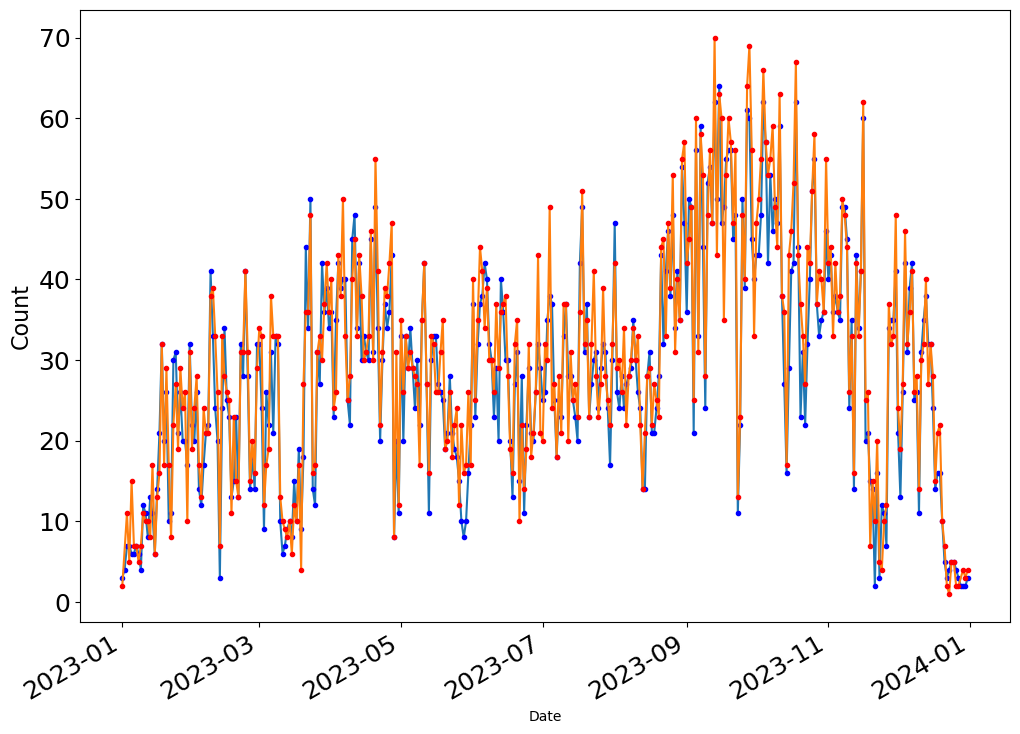

In [631]:
# Plot the pickup and drop off occurrence
fig, ax1 = plt.subplots(figsize=(12, 9))
ax1.plot_date( df_pu['started_at_date'], df_pu['pu_ct'],linestyle = 'solid',markeredgecolor = 'blue',markerfacecolor = 'blue', markersize = 3)
ax1.plot_date( df_do['ended_at_date'], df_do['do_ct'],linestyle = 'solid',markeredgecolor = 'red',markerfacecolor = 'red', markersize = 3)

ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('Count',fontsize=16)
plt.gcf().autofmt_xdate()

plt.tick_params(labelsize=18)
plt.show()  

### Weather Data

In [632]:
df_weather = pd.read_csv('washington, dc 2023-01-01 to 2023-12-31.csv')
df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"washington, dc",2023-01-01,61.4,43.5,51.8,61.4,41.7,51.2,46.2,82.2,...,8.7,4,10,2023-01-01T07:26:52,2023-01-01T16:56:42,0.32,"Rain, Partially cloudy",Clearing in the afternoon with morning rain.,rain,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
1,"washington, dc",2023-01-02,63.0,40.0,50.9,63.0,36.3,50.2,44.2,79.3,...,5.7,4,10,2023-01-02T07:26:59,2023-01-02T16:57:31,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
2,"washington, dc",2023-01-03,68.0,50.1,59.3,68.0,50.1,59.3,52.3,78.5,...,3.4,2,10,2023-01-03T07:27:04,2023-01-03T16:58:22,0.39,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
3,"washington, dc",2023-01-04,65.0,53.3,59.5,65.0,53.3,59.5,55.0,85.4,...,2.8,2,10,2023-01-04T07:27:07,2023-01-04T16:59:14,0.42,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
4,"washington, dc",2023-01-05,64.0,49.6,56.4,64.0,45.1,55.9,46.0,70.4,...,6.0,4,10,2023-01-05T07:27:08,2023-01-05T17:00:08,0.46,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."


### Check missing values

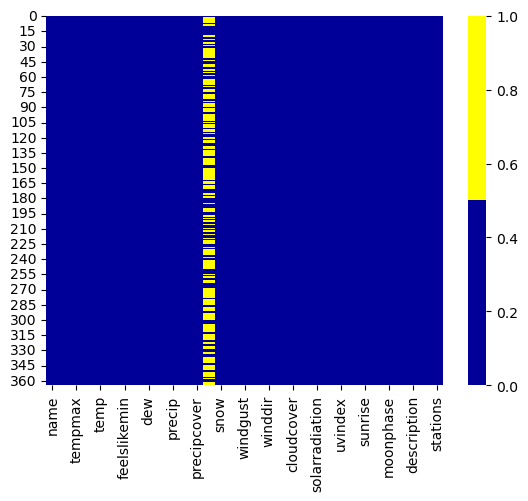

In [633]:
# Date time format 
df_weather['datetime'] = pd.to_datetime(df_weather['datetime']).dt.date

# Use sns heatmap to see whats are the null values.
coln = df_weather.columns[:df_weather.shape[1]]  
colors = ['#000099','#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(df_weather[coln].isnull(), cmap = sns.color_palette(colors))
plt.show()

### Drop missing values (weather)

In [634]:
# drop the null values for the weather data and the missing values for every and row 
df_weather = df_weather.dropna()
print(df_weather.isnull().sum())

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64


### Drop variables of your choice (weather)

In [635]:
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

In [636]:
print(df_weather.head())

      datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike  \
0   2023-01-01     61.4     43.5  51.8          61.4          41.7       51.2   
7   2023-01-08     43.8     31.5  38.0          42.0          25.2       33.4   
10  2023-01-11     46.8     32.3  39.9          42.9          26.4       37.2   
11  2023-01-12     55.0     40.6  47.2          55.0          37.1       46.2   
12  2023-01-13     54.9     39.7  48.3          54.9          31.1       43.9   

     dew  humidity  precip  ...  windspeed  winddir  sealevelpressure  \
0   46.2      82.2   0.004  ...        8.8    199.3            1015.4   
7   27.5      66.3   0.011  ...       16.6    217.1            1026.0   
10  31.6      72.9   0.019  ...       10.8    135.9            1022.0   
11  42.6      84.2   0.127  ...       10.5    183.3            1014.7   
12  37.8      68.3   0.250  ...       22.7    310.1            1005.7   

    cloudcover  visibility  solarradiation  solarenergy  uvindex  moonphas

### Merge with weather data and remove dates and station name

In [637]:
# Merge with weather data and remove dates and station name
# pickup data
df_m_pu = df_pu.merge(df_weather, left_on='started_at_date', right_on='datetime') 
df_m_pu = df_m_pu.drop(columns=['started_at_date','start_station_name','datetime'])

# dropoff data
df_m_do = df_do.merge(df_weather, left_on='ended_at_date', right_on='datetime') 
df_m_do = df_m_do.drop(columns=['ended_at_date','end_station_name','datetime'])
##Check for missing values and decide how to handle them

df_m_pu = df_m_pu.drop_duplicates()
df_m_do = df_m_do.drop_duplicates()

df_m_pu.isnull().sum()
df_m_do.isnull().sum()
df_m_pu = df_m_pu.dropna()
df_m_do = df_m_do.dropna()

print(df_m_pu.isnull().sum())
print(df_m_do.isnull().sum())

pu_ct               0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
moonphase           0
icon                0
dtype: int64
do_ct               0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy        

In [638]:
# Calculate correlations for pickup
correlations_pickup = df_m_pu.corr()

# Print correlations for pickup
print(correlations_pickup)

                     pu_ct   tempmax   tempmin      temp  feelslikemax  \
pu_ct             1.000000  0.460156  0.428216  0.454387      0.423280   
tempmax           0.460156  1.000000  0.945949  0.983835      0.991877   
tempmin           0.428216  0.945949  1.000000  0.984268      0.944452   
temp              0.454387  0.983835  0.984268  1.000000      0.978012   
feelslikemax      0.423280  0.991877  0.944452  0.978012      1.000000   
feelslikemin      0.433898  0.935809  0.994236  0.975358      0.932621   
feelslike         0.443889  0.980552  0.981769  0.997086      0.979992   
dew               0.334127  0.916208  0.955790  0.948622      0.919838   
humidity         -0.254133  0.065096  0.185567  0.119423      0.093206   
precip           -0.300076  0.050700  0.056535  0.059004      0.072507   
precipprob        0.116930  0.205237  0.267466  0.245439      0.216919   
precipcover      -0.348624 -0.157420 -0.077162 -0.115133     -0.151022   
snow              0.005469 -0.185485 -

### Befroe we drop the more values we need to check the correlations and realtionship between each features

In [639]:
# Calculate correlations for pickup
correlations_pickup = df_m_pu.corr()
# Print correlations for pickup
print(correlations_pickup)

                     pu_ct   tempmax   tempmin      temp  feelslikemax  \
pu_ct             1.000000  0.460156  0.428216  0.454387      0.423280   
tempmax           0.460156  1.000000  0.945949  0.983835      0.991877   
tempmin           0.428216  0.945949  1.000000  0.984268      0.944452   
temp              0.454387  0.983835  0.984268  1.000000      0.978012   
feelslikemax      0.423280  0.991877  0.944452  0.978012      1.000000   
feelslikemin      0.433898  0.935809  0.994236  0.975358      0.932621   
feelslike         0.443889  0.980552  0.981769  0.997086      0.979992   
dew               0.334127  0.916208  0.955790  0.948622      0.919838   
humidity         -0.254133  0.065096  0.185567  0.119423      0.093206   
precip           -0.300076  0.050700  0.056535  0.059004      0.072507   
precipprob        0.116930  0.205237  0.267466  0.245439      0.216919   
precipcover      -0.348624 -0.157420 -0.077162 -0.115133     -0.151022   
snow              0.005469 -0.185485 -

In [640]:
# Calculate correlations for dropoff
correlations_dropoff = df_m_do.corr()
# Print correlations for dropoff
print(correlations_dropoff)

                     do_ct   tempmax   tempmin      temp  feelslikemax  \
do_ct             1.000000  0.459568  0.426557  0.455129      0.424769   
tempmax           0.459568  1.000000  0.946647  0.983926      0.991862   
tempmin           0.426557  0.946647  1.000000  0.984529      0.944956   
temp              0.455129  0.983926  0.984529  1.000000      0.978014   
feelslikemax      0.424769  0.991862  0.944956  0.978014      1.000000   
feelslikemin      0.436044  0.937187  0.994338  0.976058      0.933726   
feelslike         0.449538  0.980856  0.981847  0.997129      0.980169   
dew               0.336273  0.917300  0.955822  0.949124      0.920702   
humidity         -0.250196  0.071996  0.188905  0.124902      0.099717   
precip           -0.276637  0.047841  0.055511  0.056911      0.069953   
precipprob        0.117469  0.206602  0.267905  0.246418      0.218156   
precipcover      -0.338082 -0.158571 -0.077488 -0.115872     -0.152038   
snow              0.009674 -0.186516 -

Based on the provided correlation matrix and domain knowledge  tempmax, tempmin, feelslikemax, feelslikemin, feelslike, and snowdepth due to high multicollinearity and missing data. Retain temp for temperature representation and other unique features like 'temp', 'dew', 'humidity', 'precip', 'precipprob',
'precipcover', 'snow', 'windspeed', 'winddir', 'sealevelpressure','cloudcover', 'visibility', 'solarenergy', 'uvindex', 'moonphase','icon' for varied weather insights. 
Our Final selection should align with specific analysis or modeling goals to ensure relevance and efficiency.

In [641]:
features_to_drop = ['tempmin', 'tempmax', 'solarradiation', 'snowdepth', 'feelslikemax', 
                    'feelslikemin', 'feelslike','precipprob','precipcover','snow','name', 
                    'stations','description','sunrise','sunset','conditions','severerisk',
                    'preciptype','windgust']

In [642]:
# Drop columns from df_m_pu if they exist
for column in features_to_drop:
    if column in df_m_pu.columns:
        df_m_pu = df_m_pu.drop(columns=column)

# Drop columns from df_m_do if they exist
for column in features_to_drop:
    if column in df_m_do.columns:
        df_m_do = df_m_do.drop(columns=column)

print(df_m_pu.columns)
print(df_m_do.columns)

Index(['pu_ct', 'temp', 'dew', 'humidity', 'precip', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarenergy',
       'uvindex', 'moonphase', 'icon'],
      dtype='object')
Index(['do_ct', 'temp', 'dew', 'humidity', 'precip', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarenergy',
       'uvindex', 'moonphase', 'icon'],
      dtype='object')


In [643]:
# Selected weather features and target variables for pickup
subset_pickup = df_m_pu[df_m_pu.columns]
# Calculate correlations for pickup
correlations_pickup = subset_pickup.corr()
correlations_pickup

,pu_ct,temp,dew,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarenergy,uvindex,moonphase
pu_ct,1.000000,0.454387,0.334127,-0.254133,-0.300076,0.080869,0.295349,-0.058278,-0.281984,0.358546,0.422197,0.460550,0.009596
temp,0.454387,1.000000,0.948622,0.119423,0.059004,0.017578,0.017070,-0.175491,-0.104265,0.193228,0.636915,0.656249,0.021446
dew,0.334127,0.948622,1.000000,0.425198,0.163718,-0.080082,-0.167626,-0.139838,0.080317,-0.009848,0.448781,0.484912,0.005984
humidity,-0.254133,0.119423,0.425198,1.000000,0.363966,-0.304104,-0.565800,0.046839,0.545640,-0.626442,-0.407861,-0.354935,-0.043819
precip,-0.300076,0.059004,0.163718,0.363966,1.000000,0.188836,-0.282608,-0.073662,0.275641,-0.509963,-0.204993,-0.166349,-0.007476
windspeed,0.080869,0.017578,-0.080082,-0.304104,0.188836,1.000000,0.344154,-0.321643,-0.078690,0.139232,0.098274,0.130134,-0.042359
winddir,0.295349,0.017070,-0.167626,-0.565800,-0.282608,0.344154,1.000000,-0.331398,-0.491485,0.412139,0.333498,0.354550,0.142753
sealevelpressure,-0.058278,-0.175491,-0.139838,0.046839,-0.073662,-0.321643,-0.331398,1.000000,0.000085,-0.074036,-0.138718,-0.178758,-0.039627
cloudcover,-0.281984,-0.104265,0.080317,0.545640,0.275641,-0.078690,-0.491485,0.000085,1.000000,-0.450371,-0.543333,-0.506780,-0.037981
visibility,0.358546,0.193228,-0.009848,-0.626442,-0.509963,0.139232,0.412139,-0.074036,-0.450371,1.000000,0.482460,0.498511,0.086829


In [644]:
# Selected weather features and target variables for dropoff
subset_dropoff = df_m_do[df_m_do.columns]
# Calculate correlations for dropoff
correlations_dropoff = subset_dropoff.corr()
correlations_dropoff


,do_ct,temp,dew,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarenergy,uvindex,moonphase
do_ct,1.000000,0.455129,0.336273,-0.250196,-0.276637,0.066646,0.288448,-0.102955,-0.232319,0.366060,0.405375,0.468760,0.013801
temp,0.455129,1.000000,0.949124,0.124902,0.056911,0.013390,0.021423,-0.181160,-0.100528,0.190196,0.635888,0.655335,0.022420
dew,0.336273,0.949124,1.000000,0.428744,0.163277,-0.081647,-0.167103,-0.141851,0.081883,-0.011005,0.449174,0.485537,0.006258
humidity,-0.250196,0.124902,0.428744,1.000000,0.370957,-0.297762,-0.580077,0.057181,0.541514,-0.623419,-0.403182,-0.349510,-0.046068
precip,-0.276637,0.056911,0.163277,0.370957,1.000000,0.185540,-0.279810,-0.078732,0.281369,-0.516202,-0.209651,-0.171103,-0.006539
windspeed,0.066646,0.013390,-0.081647,-0.297762,0.185540,1.000000,0.355192,-0.333435,-0.071093,0.132751,0.091730,0.123478,-0.040719
winddir,0.288448,0.021423,-0.167103,-0.580077,-0.279810,0.355192,1.000000,-0.325469,-0.503737,0.422751,0.343164,0.364887,0.141548
sealevelpressure,-0.102955,-0.181160,-0.141851,0.057181,-0.078732,-0.333435,-0.325469,1.000000,0.009004,-0.082797,-0.147685,-0.188534,-0.037854
cloudcover,-0.232319,-0.100528,0.081883,0.541514,0.281369,-0.071093,-0.503737,0.009004,1.000000,-0.446241,-0.540046,-0.503013,-0.039969
visibility,0.366060,0.190196,-0.011005,-0.623419,-0.516202,0.132751,0.422751,-0.082797,-0.446241,1.000000,0.479026,0.495002,0.088812


### Visualing relationships among features: scatterplot matrix


Correlation coefficient Pickup (temp): 0.4543866886139637
Correlation coefficient Dropoff (temp): 0.4551287327662817


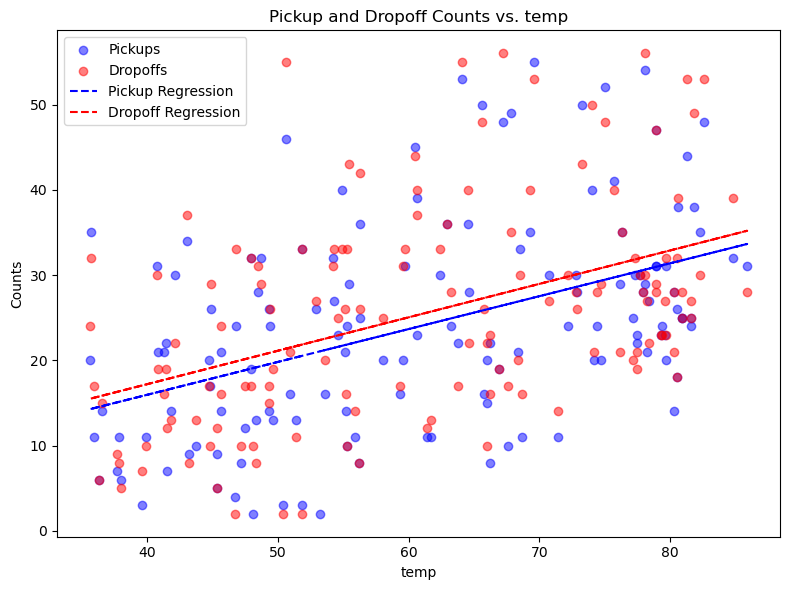

Correlation coefficient Pickup (dew): 0.334127397480726
Correlation coefficient Dropoff (dew): 0.3362728558561842


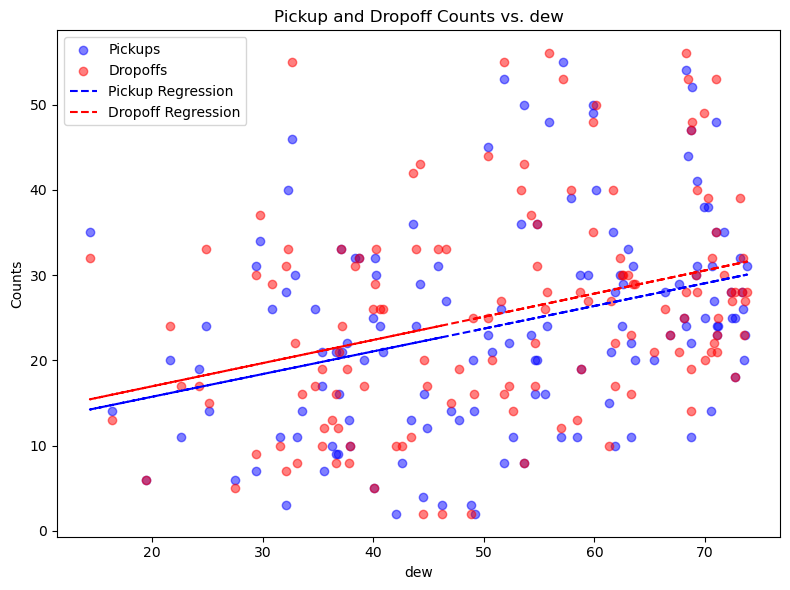

Correlation coefficient Pickup (humidity): -0.25413302494636153
Correlation coefficient Dropoff (humidity): -0.2501961117275304


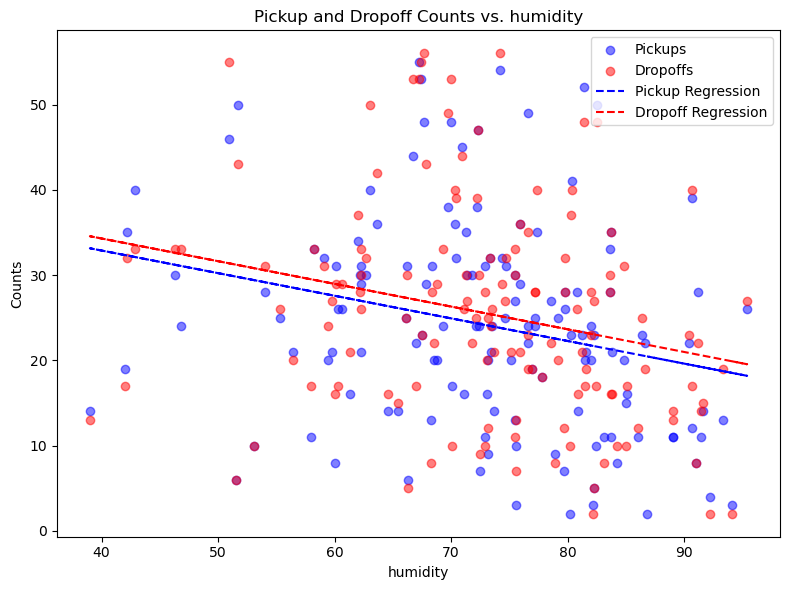

Correlation coefficient Pickup (precip): -0.30007638323957336
Correlation coefficient Dropoff (precip): -0.2766370102353653


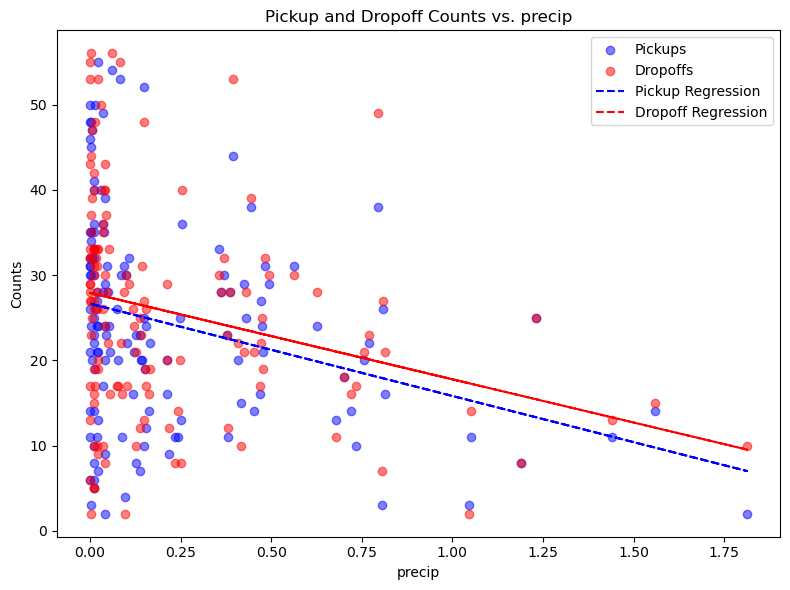

Correlation coefficient Pickup (windspeed): 0.08086908373356326
Correlation coefficient Dropoff (windspeed): 0.06664588473803505


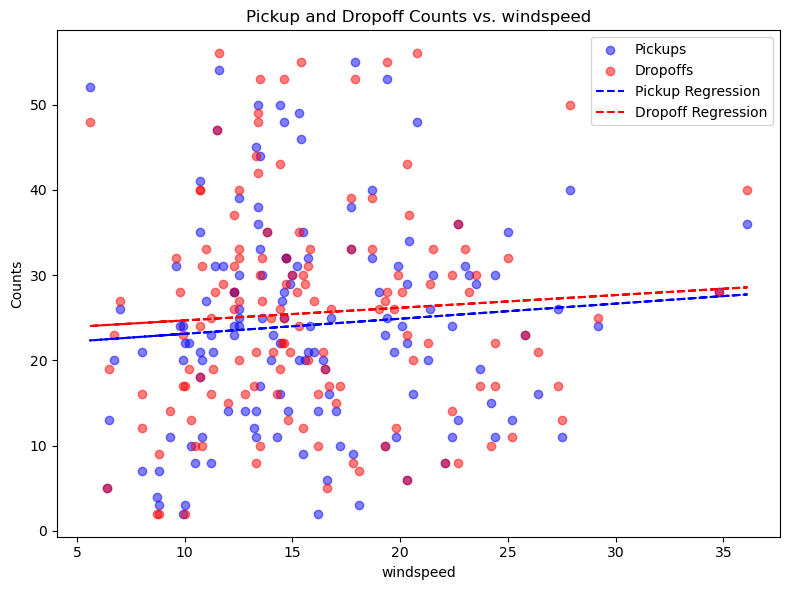

Correlation coefficient Pickup (winddir): 0.2953492989382649
Correlation coefficient Dropoff (winddir): 0.2884477409534596


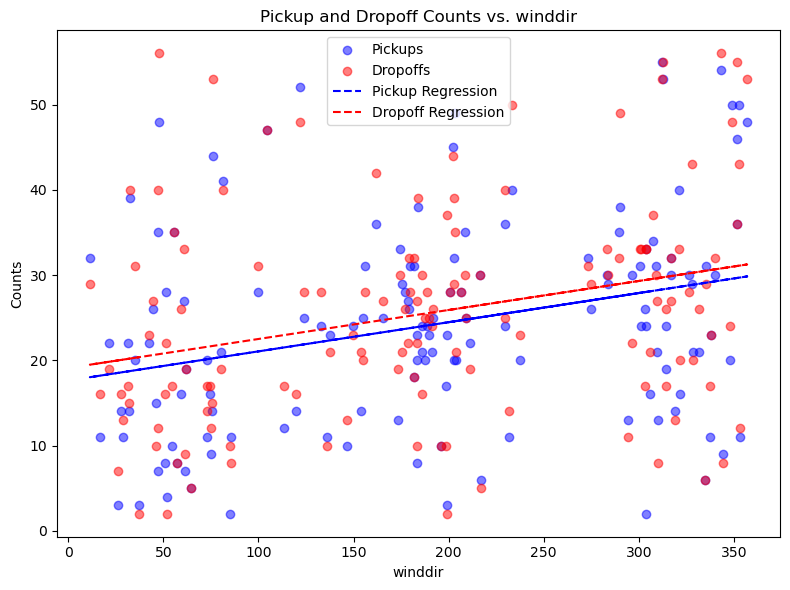

Correlation coefficient Pickup (sealevelpressure): -0.05827822868295995
Correlation coefficient Dropoff (sealevelpressure): -0.10295468316930902


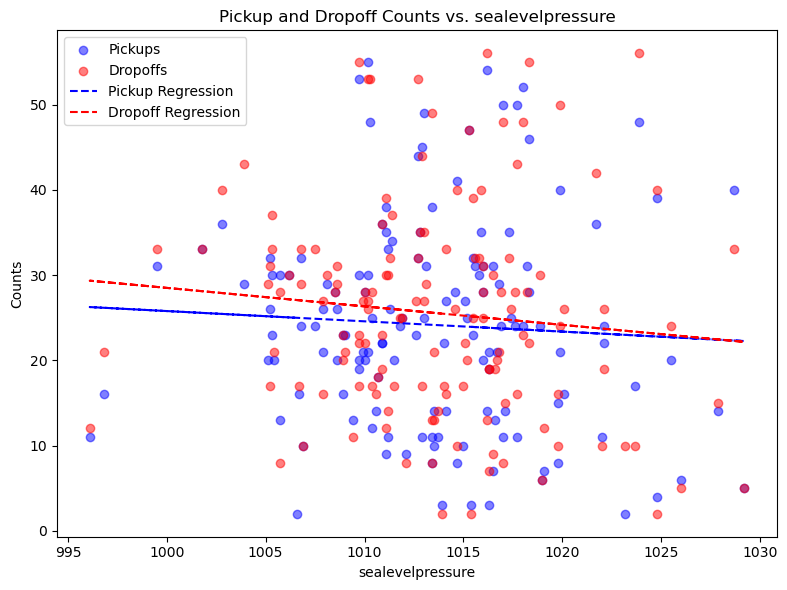

Correlation coefficient Pickup (cloudcover): -0.2819842675734801
Correlation coefficient Dropoff (cloudcover): -0.23231941552969598


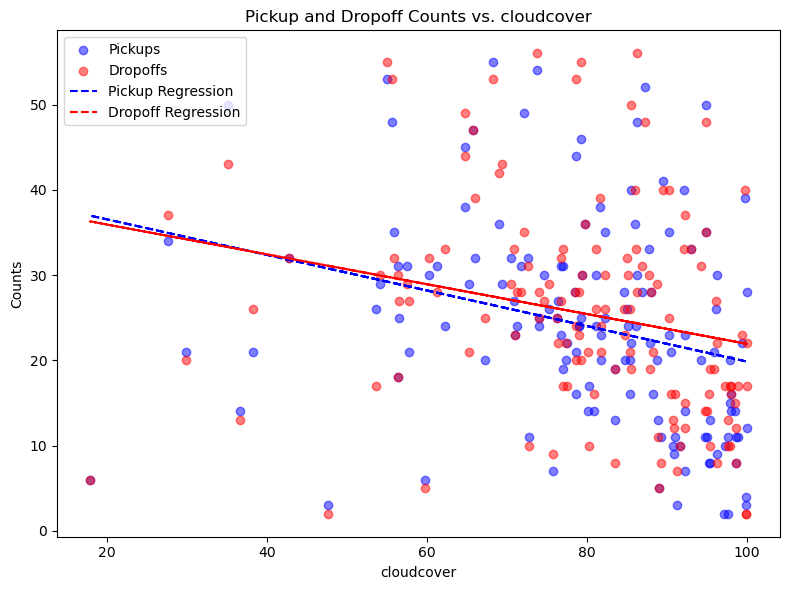

Correlation coefficient Pickup (visibility): 0.3585461944934615
Correlation coefficient Dropoff (visibility): 0.36606045489525213


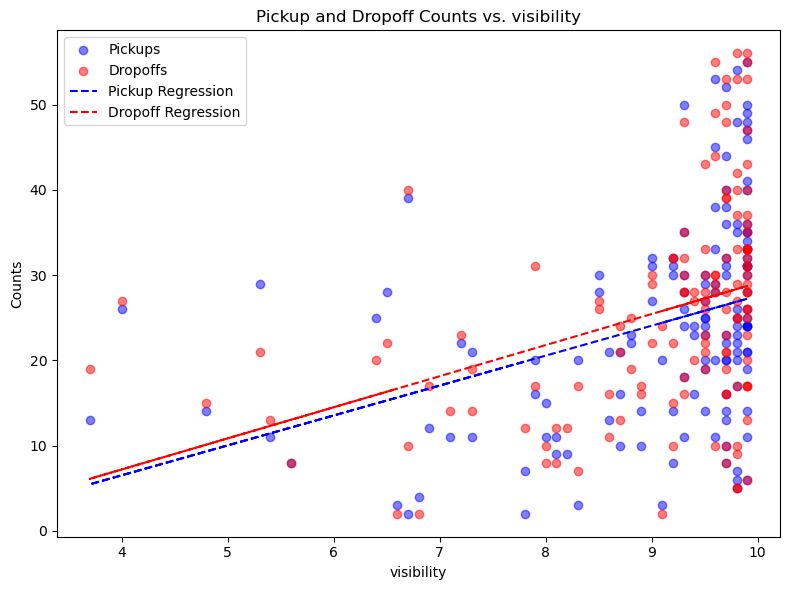

Correlation coefficient Pickup (solarenergy): 0.42219652473976327
Correlation coefficient Dropoff (solarenergy): 0.4053745108547362


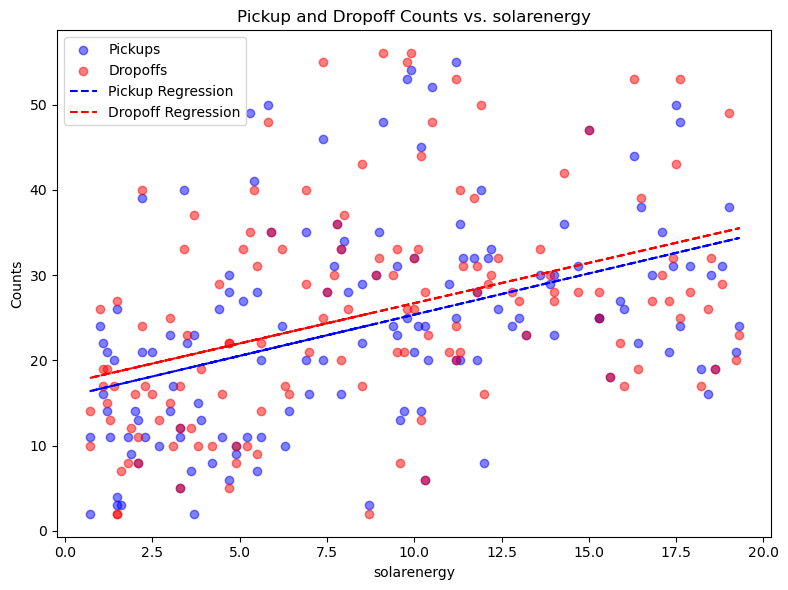

Correlation coefficient Pickup (uvindex): 0.4605498789375384
Correlation coefficient Dropoff (uvindex): 0.46876041109156363


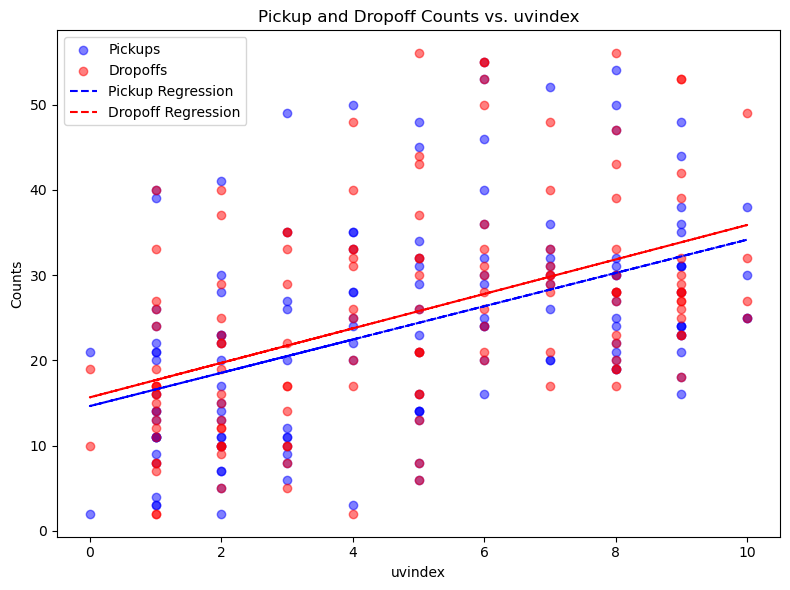

Correlation coefficient Pickup (moonphase): 0.009596337314247827
Correlation coefficient Dropoff (moonphase): 0.013801236800961092


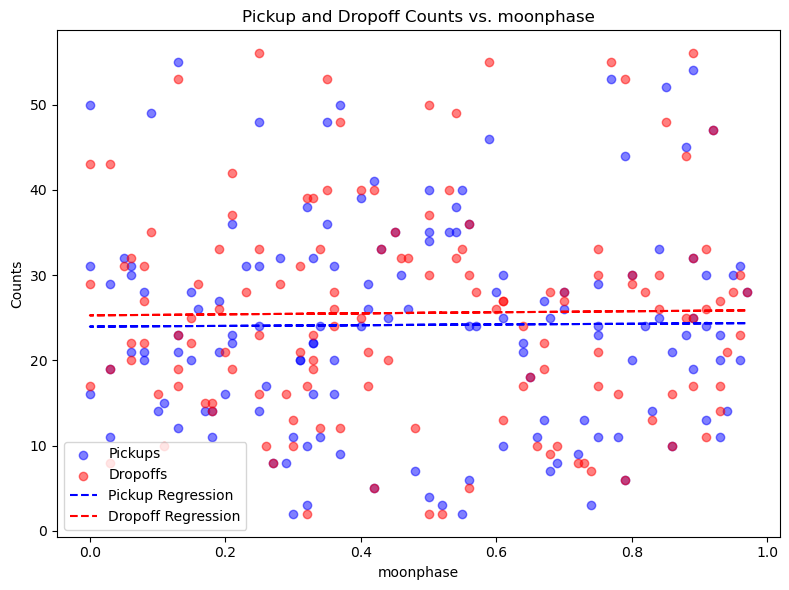

In [645]:
for var in df_m_pu.columns[1:-1]:
    plt.figure(figsize=(8, 6))
    # Scatter plot for pickup data
    plt.scatter(df_m_pu[var], df_m_pu['pu_ct'], alpha=0.5, color='blue', label='Pickups')
    correlation = df_m_pu[var].corr(df_m_pu['pu_ct'])
    print(f"Correlation coefficient Pickup ({var}):", correlation)
    # Scatter plot for dropoff data
    plt.scatter(df_m_do[var], df_m_do['do_ct'], alpha=0.5, color='red', label='Dropoffs')
    correlation = df_m_do[var].corr(df_m_do['do_ct'])
    print(f"Correlation coefficient Dropoff ({var}):", correlation)
    #  -------- Regression Lines --------
    # Pickup regression
    z_pu = np.polyfit(df_m_pu[var], df_m_pu['pu_ct'], 1)
    p_pu = np.poly1d(z_pu)
    plt.plot(df_m_pu[var], p_pu(df_m_pu[var]), "b--", label='Pickup Regression')

    # Dropoff regression
    z_do = np.polyfit(df_m_do[var], df_m_do['do_ct'], 1)
    p_do = np.poly1d(z_do)
    plt.plot(df_m_do[var], p_do(df_m_do[var]), "r--", label='Dropoff Regression')
    # Title and labels
    plt.title(f'Pickup and Dropoff Counts vs. {var}')
    plt.xlabel(var)
    plt.ylabel('Counts')
    plt.legend()
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

we will choose top highest corr featurs with pickup and dropoff

In [646]:
df_m_pu.head()


,pu_ct,temp,dew,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarenergy,uvindex,moonphase,icon
0,3,51.8,46.2,82.2,0.004,8.8,199.3,1015.4,47.7,9.1,8.7,4,0.32,rain
1,6,38.0,27.5,66.3,0.011,16.6,217.1,1026.0,59.7,9.8,4.7,3,0.56,rain
2,11,39.9,31.6,72.9,0.019,10.8,135.9,1022.0,72.8,9.6,5.2,3,0.66,rain
3,8,47.2,42.6,84.2,0.127,10.5,183.3,1014.7,95.3,9.2,4.2,3,0.69,rain
4,13,48.3,37.8,68.3,0.250,22.7,310.1,1005.7,83.5,9.7,9.6,5,0.73,rain


In [647]:
df_m_do.head()

,do_ct,temp,dew,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarenergy,uvindex,moonphase,icon
0,2,51.8,46.2,82.2,0.004,8.8,199.3,1015.4,47.7,9.1,8.7,4,0.32,rain
1,5,38.0,27.5,66.3,0.011,16.6,217.1,1026.0,59.7,9.8,4.7,3,0.56,rain
2,10,39.9,31.6,72.9,0.019,10.8,135.9,1022.0,72.8,9.6,5.2,3,0.66,rain
3,10,47.2,42.6,84.2,0.127,10.5,183.3,1014.7,95.3,9.2,4.2,3,0.69,rain
4,8,48.3,37.8,68.3,0.250,22.7,310.1,1005.7,83.5,9.7,9.6,5,0.73,rain


## 1.3-Modeling

### Prepare training data based on Feature Selection

In [648]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


In [649]:
#pickup
y_pickup = df_m_pu['pu_ct']
X_pickup = df_m_pu.drop('pu_ct',axis=1)
X_pickup = pd.get_dummies(data=df_m_pu, columns=['icon'], drop_first=True)
X_pickup.columns = [col.replace('-', '_') for col in X_pickup.columns]
X_pickup.head()

,pu_ct,temp,dew,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarenergy,uvindex,moonphase,icon_cloudy,icon_partly_cloudy_day,icon_rain,icon_snow
0,3,51.8,46.2,82.2,0.004,8.8,199.3,1015.4,47.7,9.1,8.7,4,0.32,0,0,1,0
1,6,38.0,27.5,66.3,0.011,16.6,217.1,1026.0,59.7,9.8,4.7,3,0.56,0,0,1,0
2,11,39.9,31.6,72.9,0.019,10.8,135.9,1022.0,72.8,9.6,5.2,3,0.66,0,0,1,0
3,8,47.2,42.6,84.2,0.127,10.5,183.3,1014.7,95.3,9.2,4.2,3,0.69,0,0,1,0
4,13,48.3,37.8,68.3,0.250,22.7,310.1,1005.7,83.5,9.7,9.6,5,0.73,0,0,1,0


In [650]:
# Assuming your drop-off data is in a DataFrame named df_m_do
y_dropoff = df_m_do['do_ct']
X_dropoff = df_m_do.drop('do_ct',axis=1)
X_dropoff = pd.get_dummies(data=df_m_do, columns=['icon'], drop_first=True)
X_dropoff.columns = [col.replace('-', '_') for col in X_dropoff.columns]
X_dropoff.head()

,do_ct,temp,dew,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarenergy,uvindex,moonphase,icon_cloudy,icon_partly_cloudy_day,icon_rain,icon_snow
0,2,51.8,46.2,82.2,0.004,8.8,199.3,1015.4,47.7,9.1,8.7,4,0.32,0,0,1,0
1,5,38.0,27.5,66.3,0.011,16.6,217.1,1026.0,59.7,9.8,4.7,3,0.56,0,0,1,0
2,10,39.9,31.6,72.9,0.019,10.8,135.9,1022.0,72.8,9.6,5.2,3,0.66,0,0,1,0
3,10,47.2,42.6,84.2,0.127,10.5,183.3,1014.7,95.3,9.2,4.2,3,0.69,0,0,1,0
4,8,48.3,37.8,68.3,0.250,22.7,310.1,1005.7,83.5,9.7,9.6,5,0.73,0,0,1,0


### Split into training and test for pickup and drop off

In [651]:
X_train_pickup, X_test_pickup, y_train_pickup, y_test_pickup = train_test_split(X_pickup, y_pickup, test_size=0.5, random_state=200)

In [652]:
X_train_dropoff, X_test_dropoff, y_train_dropoff, y_test_dropoff = train_test_split(X_dropoff, y_dropoff, test_size=0.5, random_state=200)

#### Build a series of linear regression models: begin with a single feature, such as 'temp', and progressively incorporate additional features, including 'temp', 'precip', 'humidity', 'windspeed', 'uvindex', 'dew', etc. Display and analyze the changes in training and test Mean Squared Errors (MSEs) when introducing more features in a plot, such as a line chart, for pickup count (pu_ct) and drop-off count (do_ct), respectively

In [653]:
features = X_pickup.columns.to_list()
features.remove('pu_ct') 
features = features[:11]
features

['temp',
 'dew',
 'humidity',
 'precip',
 'windspeed',
 'winddir',
 'sealevelpressure',
 'cloudcover',
 'visibility',
 'solarenergy',
 'uvindex']

In [654]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Initialize lists to store MSEs and RMSEs for each target
mse_train_pu = []
mse_test_pu = []
rmse_train_pu = []
rmse_test_pu = []
mse_train_do = []
mse_test_do = []
rmse_train_do = []
rmse_test_do = []

# List of features to be added progressively
features_mse = []
pu_models = {}
do_models = {}

# Iterating over the number of features to use
for i in range(1, len(features) + 1):
    # Current features
    current_features = features[:i]
    print(f"Current features: {current_features}")
    features_mse.append("\n".join(current_features))
    
    # Use your existing splits
    X_train_pu, X_test_pu, y_train_pu, y_test_pu = X_train_pickup[current_features], X_test_pickup[current_features], y_train_pickup, y_test_pickup
    X_train_do, X_test_do, y_train_do, y_test_do = X_train_dropoff[current_features], X_test_dropoff[current_features], y_train_dropoff, y_test_dropoff
    
    pu_model_key = f"pu_model_" + f"{i}"
    do_model_key = f"do_model_" + f"{i}"

    # Building the model for pu_ct
    pu_models[pu_model_key] = LinearRegression()
    pu_models[pu_model_key].fit(X_train_pu, y_train_pu)
    # Predictions
    pred_train_pu = pu_models[pu_model_key].predict(X_train_pu)
    pred_test_pu = pu_models[pu_model_key].predict(X_test_pu)
    # Calculating MSEs and RMSEs for pu_ct
    mse_train_pu.append(mean_squared_error(y_train_pu, pred_train_pu))
    mse_test_pu.append(mean_squared_error(y_test_pu, pred_test_pu))
    rmse_train_pu.append(sqrt(mean_squared_error(y_train_pu, pred_train_pu)))
    rmse_test_pu.append(sqrt(mean_squared_error(y_test_pu, pred_test_pu)))
    
    print(f"For pu_model_{i} with {i} features, Train MSE: {mse_train_pu[-1]}, Test MSE: {mse_test_pu[-1]}, Train RMSE: {rmse_train_pu[-1]}, Test RMSE: {rmse_test_pu[-1]}")
    
    # Building the model for do_ct
    do_models[do_model_key] = LinearRegression()
    do_models[do_model_key].fit(X_train_do, y_train_do)
    # Predictions
    pred_train_do = do_models[do_model_key].predict(X_train_do)
    pred_test_do = do_models[do_model_key].predict(X_test_do)
    # Calculating MSEs and RMSEs for do_ct
    mse_train_do.append(mean_squared_error(y_train_do, pred_train_do))
    mse_test_do.append(mean_squared_error(y_test_do, pred_test_do))
    rmse_train_do.append(sqrt(mean_squared_error(y_train_do, pred_train_do)))
    rmse_test_do.append(sqrt(mean_squared_error(y_test_do, pred_test_do)))
    
    print(f"For do_model_{i} with {i} features, Train MSE: {mse_train_do[-1]}, Test MSE: {mse_test_do[-1]}, Train RMSE: {rmse_train_do[-1]}, Test RMSE: {rmse_test_do[-1]}")

Current features: ['temp']
For pu_model_1 with 1 features, Train MSE: 126.30440014776757, Test MSE: 114.82263098274078, Train RMSE: 11.238523041208198, Test RMSE: 10.715532230493302
For do_model_1 with 1 features, Train MSE: 115.04132558381637, Test MSE: 133.25939950890836, Train RMSE: 10.725731936973643, Test RMSE: 11.543803511360904
Current features: ['temp', 'dew']
For pu_model_2 with 2 features, Train MSE: 116.17105218413455, Test MSE: 99.32378050995932, Train RMSE: 10.778267587332138, Test RMSE: 9.966131672316964
For do_model_2 with 2 features, Train MSE: 108.06279910774448, Test MSE: 115.17899314276158, Train RMSE: 10.3953258298018, Test RMSE: 10.73214764819985
Current features: ['temp', 'dew', 'humidity']
For pu_model_3 with 3 features, Train MSE: 115.4480376804467, Test MSE: 99.17488596372492, Train RMSE: 10.744674852244097, Test RMSE: 9.958658843625727
For do_model_3 with 3 features, Train MSE: 106.97184846365639, Test MSE: 114.55035601223562, Train RMSE: 10.342719587403325, T

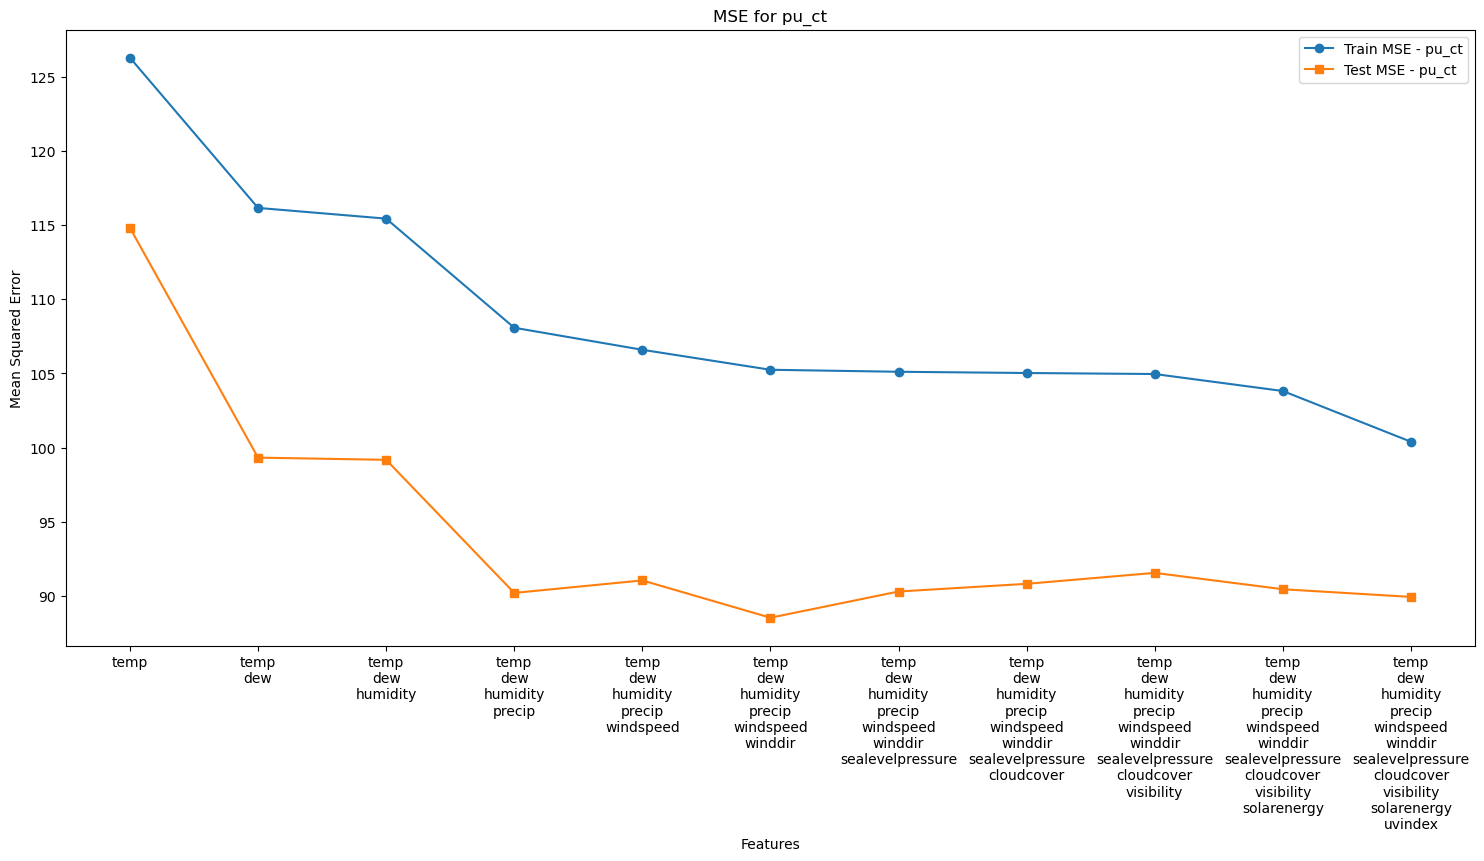

In [655]:
plt.figure(figsize=(40, 8)) 
# Plotting the MSEs
plt.subplot(1, 2, 1)
plt.plot(features_mse, mse_train_pu, label='Train MSE - pu_ct', marker='o')
plt.plot(features_mse, mse_test_pu, label='Test MSE - pu_ct', marker='s')
plt.xlabel('Features')
plt.ylabel('Mean Squared Error')
plt.title('MSE for pu_ct')
plt.legend()

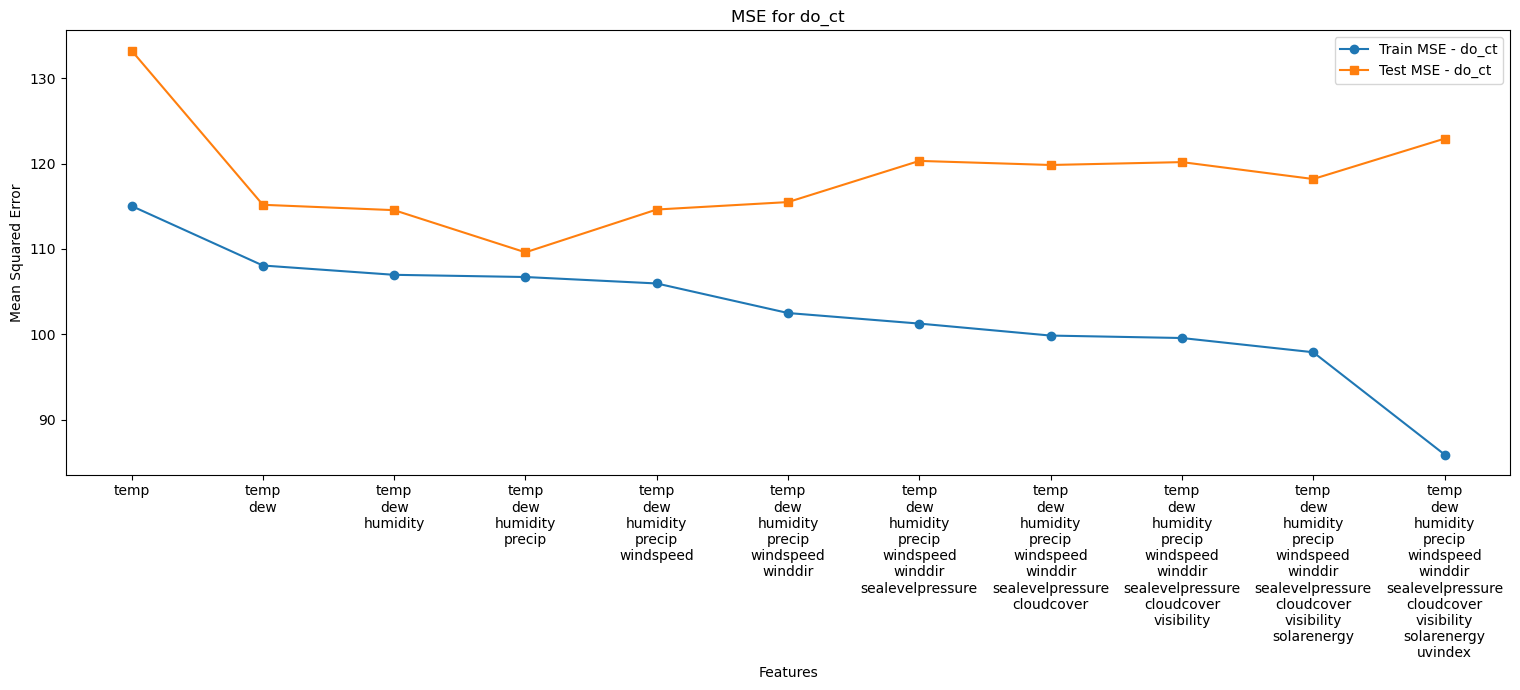

In [656]:
plt.figure(figsize=(30, 7))  # Set the figure size to 10 inches wide and 5 inches tall
plt.subplot(1, 2, 2)
plt.plot(features_mse, mse_train_do, label='Train MSE - do_ct', marker='o')
plt.plot(features_mse, mse_test_do, label='Test MSE - do_ct', marker='s')
plt.xlabel('Features')
plt.ylabel('Mean Squared Error')
plt.title('MSE for do_ct')
plt.legend()

plt.tight_layout()
plt.show()

The addition of features in the pickup models consistently reduces both training and test MSE, with the 11-feature model achieving the lowest errors, indicating a progressively better fit and generalization. 
The drop-off (do) models show a more complex pattern, with the lowest training MSE at 11 features but an increase in test MSE after 2 features, suggesting a potential overfit as more features are added. 
Overall, the pickup models improve with complexity, whereas the drop-off models may benefit from a simpler approach.

#### Build a series of linear regression models (Pick up)

##### Pick up using one Feature(temp', 'dew', 'humidity', 'precip', 'windspeed', 'winddir','sealevelpressure', 'cloudcover' ,'visibility', 'solarenergy','uvindex', 'moonphase', 'icon_cloudy', 'icon_partly_cloudy_day','icon_rain', 'icon_snow') vs pick up each and print all the result 

In [657]:
# List of features
features = X_train_pickup.columns
features = features.drop('pu_ct')
# Initialize dictionaries to store models and MSEs
models = {}
train_mses = {}
test_mses = {}
# Loop over all features
for feature in features:
    # Fit the model on the training data using statsmodels formula API
    model = smf.ols(f'pu_ct ~ {feature}', data=X_train_pickup).fit()
    # Store the model
    models[feature] = model
    # Predict on the test data
    X_test_pickup['predictions'] = model.predict(X_test_pickup[[feature]])
    
    # Calculate the MSE on the test data and store it
    test_mses[feature] = ((y_test_pickup - X_test_pickup['predictions']) ** 2).mean()
    
    # Predict on the training data for comparison
    X_train_pickup['predictions'] = model.predict(X_train_pickup[[feature]])
    # Calculate the MSE on the training data and store it
    train_mses[feature] = ((y_train_pickup - X_train_pickup['predictions']) ** 2).mean()
    
# Print the models' summaries
for feature in features:
    model_summary = models[feature].summary()
    print(f"Feature: {feature.replace('_', ' ')}")
    print(model_summary)
    print("\n")
   

Feature: temp
                            OLS Regression Results                            
Dep. Variable:                  pu_ct   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     20.49
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           2.48e-05
Time:                        21:38:19   Log-Likelihood:                -268.68
No. Observations:                  70   AIC:                             541.4
Df Residuals:                      68   BIC:                             545.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7774      5.945     -

##### Pick up and Adding mutlupile featrues

In [658]:
# try to add more variables
pu_ct_model_ = smf.ols('pu_ct ~  temp + precip', data =X_train_pickup).fit()
print(pu_ct_model_.summary())

# Predict values for training set
train_predictions = pu_ct_model_.predict(X_train_pickup)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_pickup['pu_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_pickup
test_predictions = pu_ct_model_.predict(X_test_pickup)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_pickup['pu_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  pu_ct   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     15.37
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           3.22e-06
Time:                        21:38:19   Log-Likelihood:                -264.68
No. Observations:                  70   AIC:                             535.4
Df Residuals:                      67   BIC:                             542.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8804      5.666     -0.332      0.7

In [659]:
# try to add more variables
pu_ct_model_ = smf.ols('pu_ct ~  temp + precip + humidity + windspeed + cloudcover + visibility + uvindex + sealevelpressure', data =X_train_pickup).fit()
print(pu_ct_model_.summary())

# Predict values for training set
train_predictions = pu_ct_model_.predict(X_train_pickup)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_pickup['pu_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_pickup
test_predictions = pu_ct_model_.predict(X_test_pickup)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_pickup['pu_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  pu_ct   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     4.235
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           0.000437
Time:                        21:38:19   Log-Likelihood:                -262.44
No. Observations:                  70   AIC:                             542.9
Df Residuals:                      61   BIC:                             563.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          139.2090    278.822  

In [660]:
# try to add more variables
pu_ct_model_ = smf.ols('pu_ct ~  temp + precip + humidity', data =X_train_pickup).fit()
print(pu_ct_model_.summary())

# Predict values for training set
train_predictions = pu_ct_model_.predict(X_train_pickup)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_pickup['pu_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_pickup
test_predictions = pu_ct_model_.predict(X_test_pickup)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_pickup['pu_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  pu_ct   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     11.45
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           3.88e-06
Time:                        21:38:19   Log-Likelihood:                -263.23
No. Observations:                  70   AIC:                             534.5
Df Residuals:                      66   BIC:                             543.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8643      8.971      1.100      0.2

In [661]:
# try to add more variables
pu_ct_model_ = smf.ols('pu_ct ~  temp + precip + humidity + uvindex + dew', data =X_train_pickup).fit()
print(pu_ct_model_.summary())

# Predict values for training set
train_predictions = pu_ct_model_.predict(X_train_pickup)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_pickup['pu_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_pickup
test_predictions = pu_ct_model_.predict(X_test_pickup)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_pickup['pu_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  pu_ct   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     6.689
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           4.54e-05
Time:                        21:38:19   Log-Likelihood:                -263.18
No. Observations:                  70   AIC:                             538.4
Df Residuals:                      64   BIC:                             551.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5242     85.899      0.134      0.8

In [662]:
# try to add more variables
pu_ct_model_ = smf.ols('pu_ct ~ temp + precip + humidity + uvindex + dew + windspeed', data =X_train_pickup).fit()
print(pu_ct_model_.summary())
# Predict values for training set
train_predictions = pu_ct_model_.predict(X_train_pickup)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_pickup['pu_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_pickup
test_predictions = pu_ct_model_.predict(X_test_pickup)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_pickup['pu_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  pu_ct   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     5.701
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           8.80e-05
Time:                        21:38:19   Log-Likelihood:                -262.72
No. Observations:                  70   AIC:                             539.4
Df Residuals:                      63   BIC:                             555.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0946     86.045      0.106      0.9

In [663]:
# try to add more variables
pu_ct_model_ = smf.ols('pu_ct ~ temp + precip + humidity + uvindex + dew + windspeed + winddir + sealevelpressure + cloudcover + visibility + solarenergy + moonphase  + icon_partly_cloudy_day + icon_rain', data =X_train_pickup).fit()
print(pu_ct_model_.summary())

# Predict values for training set
train_predictions = pu_ct_model_.predict(X_train_pickup)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_pickup['pu_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_pickup
test_predictions = pu_ct_model_.predict(X_test_pickup)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_pickup['pu_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  pu_ct   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     3.065
Date:                Sun, 10 Mar 2024   Prob (F-statistic):            0.00150
Time:                        21:38:19   Log-Likelihood:                -257.71
No. Observations:                  70   AIC:                             545.4
Df Residuals:                      55   BIC:                             579.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -29

In [664]:
# try to add more variables
pu_ct_model_ = smf.ols('pu_ct ~  temp + precip + humidity*icon_rain', data =X_train_pickup).fit()
print(pu_ct_model_.summary())

# Predict values for training set
train_predictions = pu_ct_model_.predict(X_train_pickup)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_pickup['pu_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_pickup
test_predictions = pu_ct_model_.predict(X_test_pickup)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_pickup['pu_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  pu_ct   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     7.315
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           1.79e-05
Time:                        21:38:19   Log-Likelihood:                -262.08
No. Observations:                  70   AIC:                             536.2
Df Residuals:                      64   BIC:                             549.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.3722     55

In [665]:
# try to add more variables
pu_ct_model_ = smf.ols('pu_ct ~  temp + precip +humidity + icon_rain', data =X_train_pickup).fit()
print(pu_ct_model_.summary())

# Predict values for training set
train_predictions = pu_ct_model_.predict(X_train_pickup)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_pickup['pu_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_pickup
test_predictions = pu_ct_model_.predict(X_test_pickup)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_pickup['pu_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  pu_ct   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     9.277
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           5.41e-06
Time:                        21:38:19   Log-Likelihood:                -262.09
No. Observations:                  70   AIC:                             534.2
Df Residuals:                      65   BIC:                             545.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8809      9.786      0.397      0.6

In [666]:
# try to add more variables
best_pu_ct_model_ = smf.ols('pu_ct ~  temp*windspeed + precip', data =X_train_pickup).fit()
print(best_pu_ct_model_.summary())

# Predict values for training set
train_predictions = best_pu_ct_model_.predict(X_train_pickup)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_pickup['pu_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_pickup
test_predictions = best_pu_ct_model_.predict(X_test_pickup)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_pickup['pu_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  pu_ct   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     10.63
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           1.09e-06
Time:                        21:38:19   Log-Likelihood:                -260.28
No. Observations:                  70   AIC:                             530.6
Df Residuals:                      65   BIC:                             541.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -43.0435     15.446     -2.

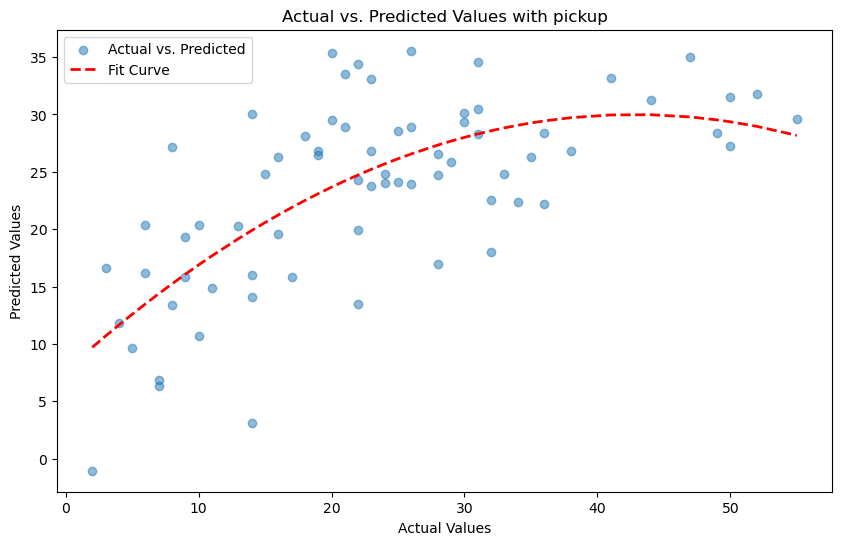

In [667]:
# Calculate predicted values
X_train_pickup['predicted_pu_ct'] = best_pu_ct_model_.predict(X_train_pickup)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pickup['pu_ct'], X_train_pickup['predicted_pu_ct'], alpha=0.5, label='Actual vs. Predicted')

# Fit a polynomial curve to the predicted values
z = np.polyfit(X_train_pickup['pu_ct'], X_train_pickup['predicted_pu_ct'], deg=2)
p = np.poly1d(z)

# Plot the curve
pu_ct_sorted = np.sort(X_train_pickup['pu_ct'])
plt.plot(pu_ct_sorted, p(pu_ct_sorted), "r--", linewidth=2, label='Fit Curve')

plt.title('Actual vs. Predicted Values with pickup')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

The OLS regression model demonstrates a better fit for predicting the dependent variable 'pu_ct' with a higher R-squared value of 0.395, indicating that nearly 40% of the variation in pickup counts can be explained by the model's variables. The lower AIC and BIC values suggest that the model is more efficient at balancing goodness of fit with complexity. The coefficients for 'temp', 'windspeed', and their interaction term 'temp:windspeed' are statistically significant, pointing to a more nuanced relationship between these variables and the pickup counts. Additionally, 'precip' has a negative impact on 'pu_ct' which is also significant.


#### Build a series of linear regression models (Drop Off)

##### Drop off using one Feature(temp', 'dew', 'humidity', 'precip', 'windspeed', 'winddir','sealevelpressure', 'cloudcover' ,'visibility', 'solarenergy','uvindex', 'moonphase', 'icon_cloudy', 'icon_partly_cloudy_day','icon_rain', 'icon_snow') vs pick up each and print all the result 

In [668]:
# List of features
features = X_train_dropoff.columns
features = features.drop('do_ct')
# Initialize dictionaries to store models and MSEs
models = {}
train_mses = {}
test_mses = {}
# Loop over all features
for feature in features:
    # Fit the model on the training data using statsmodels formula API
    model = smf.ols(f'do_ct ~ {feature}', data=X_train_dropoff).fit()
    # Store the model
    models[feature] = model
    # Predict on the test data
    X_test_dropoff['predictions'] = model.predict(X_test_dropoff[[feature]])
    
    # Calculate the MSE on the test data and store it
    test_mses[feature] = ((y_test_dropoff - X_test_dropoff['predictions']) ** 2).mean()
    
    # Predict on the training data for comparison
    X_train_dropoff['predictions'] = model.predict(X_train_dropoff[[feature]])
    # Calculate the MSE on the training data and store it
    train_mses[feature] = ((y_train_dropoff - X_train_dropoff['predictions']) ** 2).mean()
    
# Print the models' summaries
for feature in features:
    model_summary = models[feature].summary()
    print(f"Feature: {feature.replace('_', ' ')}")
    print(model_summary)
    print("\n")

Feature: temp
                            OLS Regression Results                            
Dep. Variable:                  do_ct   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     20.19
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           2.80e-05
Time:                        21:38:19   Log-Likelihood:                -265.41
No. Observations:                  70   AIC:                             534.8
Df Residuals:                      68   BIC:                             539.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1177      5.721     -

##### Drop Off and Adding mutlupile featrues

In [669]:
# Fit the model for drop-off
do_ct_model_ = smf.ols('do_ct ~  temp + precip', data =X_train_dropoff).fit()
print(do_ct_model_.summary())

# Predict values for training set
train_predictions = do_ct_model_.predict(X_train_dropoff)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_dropoff['do_ct'], train_predictions)
rmse_train = sqrt(mse_train)

test_predictions = do_ct_model_.predict(X_test_dropoff)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_dropoff['do_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  do_ct   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     11.02
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           7.26e-05
Time:                        21:38:19   Log-Likelihood:                -264.55
No. Observations:                  70   AIC:                             535.1
Df Residuals:                      67   BIC:                             541.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      5.700      0.042      0.9

In [670]:
# Fit the model for drop-off
do_ct_model_ = smf.ols('do_ct ~  temp + precip + humidity + windspeed + sealevelpressure', data =X_train_dropoff).fit()
print(do_ct_model_.summary())

# Predict values for training set
train_predictions = do_ct_model_.predict(X_train_dropoff)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_dropoff['do_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_dropoff
test_predictions = do_ct_model_.predict(X_test_dropoff)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_dropoff['do_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  do_ct   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     5.503
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           0.000283
Time:                        21:38:19   Log-Likelihood:                -261.99
No. Observations:                  70   AIC:                             536.0
Df Residuals:                      64   BIC:                             549.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          311.4053    267.730  

In [671]:
# Fit the model for drop-off
do_ct_model_ = smf.ols('do_ct ~  temp + precip + humidity', data =X_train_dropoff).fit()
print(do_ct_model_.summary())

# Predict values for training set
train_predictions = do_ct_model_.predict(X_train_dropoff)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_dropoff['do_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_dropoff
test_predictions = do_ct_model_.predict(X_test_dropoff)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_dropoff['do_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')  

                            OLS Regression Results                            
Dep. Variable:                  do_ct   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     8.666
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           6.28e-05
Time:                        21:38:19   Log-Likelihood:                -262.88
No. Observations:                  70   AIC:                             533.8
Df Residuals:                      66   BIC:                             542.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4099      9.238      1.452      0.1

In [672]:
# Fit the model for drop-off
do_ct_model_ = smf.ols('do_ct ~  temp + precip + humidity + windspeed', data =X_train_dropoff).fit()
print(do_ct_model_.summary())

# Predict values for training set
train_predictions = do_ct_model_.predict(X_train_dropoff)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_dropoff['do_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_dropoff
test_predictions = do_ct_model_.predict(X_test_dropoff)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_dropoff['do_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  do_ct   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     6.556
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           0.000170
Time:                        21:38:19   Log-Likelihood:                -262.65
No. Observations:                  70   AIC:                             535.3
Df Residuals:                      65   BIC:                             546.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.5798     11.193      1.571      0.1

In [673]:
# Fit the model for drop-off
do_ct_model_ = smf.ols('do_ct ~ temp + precip + humidity + uvindex + dew + windspeed', data =X_train_dropoff).fit()
print(do_ct_model_.summary())

# Predict values for training set
train_predictions = do_ct_model_.predict(X_train_dropoff)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_dropoff['do_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_dropoff
test_predictions = do_ct_model_.predict(X_test_dropoff)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_dropoff['do_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  do_ct   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     4.327
Date:                Sun, 10 Mar 2024   Prob (F-statistic):            0.00102
Time:                        21:38:19   Log-Likelihood:                -262.43
No. Observations:                  70   AIC:                             538.9
Df Residuals:                      63   BIC:                             554.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.3085     85.824      0.656      0.5

In [674]:
# Fit the model for drop-off
do_ct_model_ = smf.ols('do_ct ~  temp + precip + humidity*icon_rain', data =X_train_dropoff).fit()
print(do_ct_model_.summary())

# Predict values for training set
train_predictions = do_ct_model_.predict(X_train_dropoff)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_dropoff['do_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_dropoff
test_predictions = do_ct_model_.predict(X_test_dropoff)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_dropoff['do_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  do_ct   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     6.022
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           0.000126
Time:                        21:38:19   Log-Likelihood:                -261.01
No. Observations:                  70   AIC:                             534.0
Df Residuals:                      64   BIC:                             547.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -38.1468     29

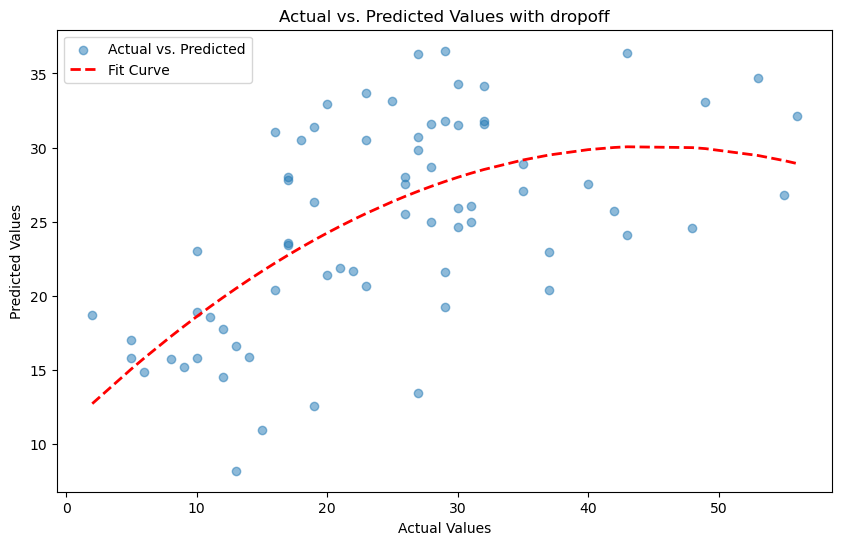

In [675]:
# Calculate predicted values
X_train_dropoff['predicted_do_ct'] = do_ct_model_.predict(X_train_dropoff)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_train_dropoff['do_ct'], X_train_dropoff['predicted_do_ct'], alpha=0.5, label='Actual vs. Predicted')

# Fit a polynomial curve to the predicted values
z = np.polyfit(X_train_dropoff['do_ct'], X_train_dropoff['predicted_do_ct'], deg=2)
p = np.poly1d(z)

# Plot the curve
do_ct_sorted = np.sort(X_train_dropoff['do_ct'])
plt.plot(do_ct_sorted, p(do_ct_sorted), "r--", linewidth=2, label='Fit Curve')

plt.title('Actual vs. Predicted Values with dropoff')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [676]:
# Fit the model for drop-off
do_ct_model_ = smf.ols('do_ct ~  temp + precip', data =X_train_dropoff).fit()
print(do_ct_model_.summary())

# Predict values for training set
train_predictions = do_ct_model_.predict(X_train_dropoff)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_dropoff['do_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_dropoff
test_predictions = do_ct_model_.predict(X_test_dropoff)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_dropoff['do_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  do_ct   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     11.02
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           7.26e-05
Time:                        21:38:19   Log-Likelihood:                -264.55
No. Observations:                  70   AIC:                             535.1
Df Residuals:                      67   BIC:                             541.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      5.700      0.042      0.9

In [677]:
# Fit the model for drop-off
do_ct_model_ = smf.ols('do_ct ~  temp*windspeed + precip', data =X_train_dropoff).fit()
print(do_ct_model_.summary())

# Predict values for training set
train_predictions = do_ct_model_.predict(X_train_dropoff)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_dropoff['do_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_dropoff
test_predictions = do_ct_model_.predict(X_test_dropoff)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_dropoff['do_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  do_ct   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     6.208
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           0.000271
Time:                        21:38:19   Log-Likelihood:                -263.18
No. Observations:                  70   AIC:                             536.4
Df Residuals:                      65   BIC:                             547.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -24.1577     16.729     -1.

In [678]:
best_do_ct_model_ = smf.ols('do_ct ~  temp + dew + temp*moonphase', data =X_train_dropoff).fit()
print(best_do_ct_model_.summary())

# Predict values for training set
train_predictions = best_do_ct_model_.predict(X_train_dropoff)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(X_train_dropoff['do_ct'], train_predictions)
rmse_train = sqrt(mse_train)

# Assuming you have a test set named X_test_dropoff
test_predictions = best_do_ct_model_.predict(X_test_dropoff)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(X_test_dropoff['do_ct'], test_predictions)
rmse_test = sqrt(mse_test)

print(f'Training MSE: {mse_train}, Training RMSE: {rmse_train}')
print(f'Test MSE: {mse_test}, Test RMSE: {rmse_test}')

                            OLS Regression Results                            
Dep. Variable:                  do_ct   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     7.748
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           3.61e-05
Time:                        21:38:19   Log-Likelihood:                -260.86
No. Observations:                  70   AIC:                             531.7
Df Residuals:                      65   BIC:                             543.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         15.8214     12.198      1.

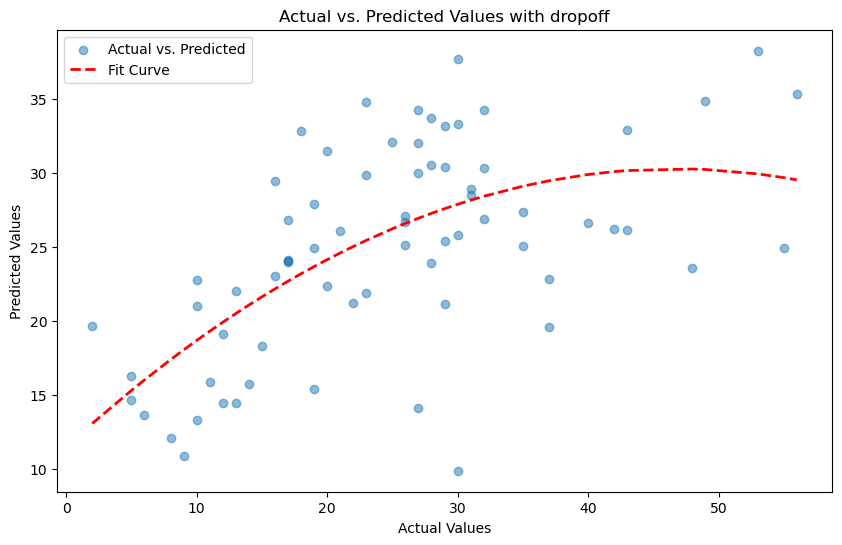

In [679]:
# Calculate predicted values
X_train_dropoff['predicted_do_ct'] = best_do_ct_model_.predict(X_train_dropoff)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_train_dropoff['do_ct'], X_train_dropoff['predicted_do_ct'], alpha=0.5, label='Actual vs. Predicted')

# Fit a polynomial curve to the predicted values
z = np.polyfit(X_train_dropoff['do_ct'], X_train_dropoff['predicted_do_ct'], deg=2)
p = np.poly1d(z)

# Plot the curve
do_ct_sorted = np.sort(X_train_dropoff['do_ct'])
plt.plot(do_ct_sorted, p(do_ct_sorted), "r--", linewidth=2, label='Fit Curve')

plt.title('Actual vs. Predicted Values with dropoff')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

The best OLS because it deemonstrates a good fit with an R-squared value of 0.323, indicating it explains approximately 32.3% of the variance in the dependent variable. It shows statistically significant relationships between the dependent variable and predictors such as temperature, dew point, moon phase, and the interaction between temperature and moon phase. The model achieves a lower training MSE and RMSE, suggesting a reasonably good prediction accuracy on the training data.

### The best linear regression models for predicting pu_ct and do_ct based on the observations in section 2


Pick Up:
The OLS regression for pu_ct shows an R-squared of 0.395, indicating the model explains 39.5% of the variability with significant predictors including temperature, windspeed, their interaction, and precipitation. Significant negative effects are observed for precipitation and the interaction of temperature with windspeed, suggesting complex relationships affecting pu_ct. Model diagnostics hint at potential multicollinearity issues, with performance metrics showing a training RMSE of 9.968 and a slightly higher test RMSE of 10.130, indicating good model generalizability

Drop off:
The OLS regression model for predicting do_ct explains approximately 32.3% of its variance, with temperature, dew point, moon phase, and their interactions as significant predictors. A high condition number suggests potential multicollinearity among predictors, which could destabilize estimates. The model shows moderate performance, with an RMSE of 10.051 on training data and 11.108 on test data, indicating room for improvement through further refinement and validation

### Business Understanding

#### For Capital Bikeshare's operations managers, we've used specialized computer programs (models) to guess how many bikes will be picked up and dropped off at the one station. By analyzing weather and other factors, the program estimated about 28 bikes will be picked up and 19 bikes will be dropped off. This helps us plan better for bike availability and ensure there are enough bikes for everyone who wants to use the service.

In [680]:
test_instance_pickup = X_test_pickup.iloc[0, :]
test_instance_dropoff = X_test_dropoff.iloc[0, :]
predicted_pu_ct = int(best_pu_ct_model_.predict(test_instance_pickup))
predicted_do_ct = int(best_do_ct_model_.predict(test_instance_dropoff))
print(f"Predicted pick up for the day: {predicted_pu_ct}","Predicted drop off for the day ",predicted_do_ct)

Predicted pick up for the day: 27 Predicted drop off for the day  19


#### How you can we manimiaze the lost based on the decstion off choesen the number of bikes avabale and number of docks 

In [681]:
total = 17
number_of_bikes_available = np.array(list(range(0,total+1)))
number_of_docks_available = np.array(list(range(total,-1,-1)))

no_bike_penalty = 5
no_dock_penalty = 2

optimization = pd.DataFrame()
optimization['num_bikes'] = number_of_bikes_available
optimization['num_docks'] = number_of_docks_available

optimization['loss_from_no_bike'] =  no_bike_penalty*(predicted_pu_ct - number_of_bikes_available)
optimization['loss_from_no_dock'] = no_dock_penalty*(predicted_do_ct - number_of_docks_available)

optimization['total_loss'] = optimization['loss_from_no_bike'] + optimization['loss_from_no_dock']

print(optimization)

    num_bikes  num_docks  loss_from_no_bike  loss_from_no_dock  total_loss
0           0         17                135                  4         139
1           1         16                130                  6         136
2           2         15                125                  8         133
3           3         14                120                 10         130
4           4         13                115                 12         127
5           5         12                110                 14         124
6           6         11                105                 16         121
7           7         10                100                 18         118
8           8          9                 95                 20         115
9           9          8                 90                 22         112
10         10          7                 85                 24         109
11         11          6                 80                 26         106
12         12          5 

Based on the penalties and results above we can see that the least losses will occurr when we choose number of bikes = 17 and number of docks = 0  for the given predicted demand of pickup and dropoffs on the day and also based on the penalty for each of the missed opportunities

# Part II

Based on the train_test_split in Group Assignment comment we have to comabied the pick up and drop off in (tranning-test)

## Setup the data

In [682]:
df_weather = pd.read_csv('washington, dc 2023-01-01 to 2023-12-31.csv')
df_weather.head()

# List of columns to keep for the washington weather data based on the pickup and dropoff data part 1
columns_to_keep = ['datetime', 'temp', 'dew', 'humidity', 'precip', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarenergy',
       'uvindex', 'moonphase', 'icon']
# List of columns to drop
columns_to_drop = [col for col in df_weather.columns if col not in columns_to_keep]

# Drop the columns
df_weather = df_weather.drop(columns=columns_to_drop)
df_weather['datetime'] = pd.to_datetime(df_weather['datetime']).dt.date
# Print the modified dataframe
df_weather.head()


,datetime,temp,dew,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarenergy,uvindex,moonphase,icon
0,2023-01-01,51.8,46.2,82.2,0.004,8.8,199.3,1015.4,47.7,9.1,8.7,4,0.32,rain
1,2023-01-02,50.9,44.2,79.3,0.000,9.1,190.8,1019.8,87.8,9.8,5.7,4,0.35,partly-cloudy-day
2,2023-01-03,59.3,52.3,78.5,0.000,17.7,196.2,1014.1,90.8,9.7,3.4,2,0.39,cloudy
3,2023-01-04,59.5,55.0,85.4,0.000,14.1,194.4,1010.4,85.2,9.9,2.8,2,0.42,partly-cloudy-day
4,2023-01-05,56.4,46.0,70.4,0.000,12.6,231.5,1013.3,75.8,9.9,6.0,4,0.46,partly-cloudy-day


In [683]:
# Merge the pickup and dropoff dataframes on the date column
df_combined = pd.merge(df_pu, df_do, left_on='started_at_date', right_on='ended_at_date', how='outer')
# Fill NaN values with 0 in 'pu_ct' and 'do_ct'
df_combined[['pu_ct', 'do_ct']] = df_combined[['pu_ct', 'do_ct']].fillna(0)
# Drop the 'ended_at_date' column
df_combined = df_combined.drop(['ended_at_date'], axis=1)
# Rename 'started_at_date' to 'date'
df_combined = df_combined.rename(columns={'started_at_date': 'date'})
# Convert 'pu_ct' and 'do_ct' to integer
df_combined['pu_ct'] = df_combined['pu_ct'].astype(int)
df_combined['do_ct'] = df_combined['do_ct'].astype(int)
# Print the combined dataframe
df_combined.head(181)

,date,start_station_name,pu_ct,end_station_name,do_ct
0,2023-01-01,22nd & H St NW,3,22nd & H St NW,2
1,2023-01-02,22nd & H St NW,4,NaN,0
2,2023-01-03,22nd & H St NW,7,22nd & H St NW,11
3,2023-01-04,22nd & H St NW,7,22nd & H St NW,5
4,2023-01-05,22nd & H St NW,6,22nd & H St NW,15
...,...,...,...,...,...
176,2023-06-26,22nd & H St NW,21,22nd & H St NW,18
177,2023-06-27,22nd & H St NW,20,22nd & H St NW,21
178,2023-06-28,22nd & H St NW,26,22nd & H St NW,26
179,2023-06-29,22nd & H St NW,32,22nd & H St NW,43


In [684]:
# Merge df_combined with df_weather
df_final = df_combined.merge(df_weather, left_on='date', right_on='datetime')
df_final = df_final.drop(['datetime'], axis=1)
df_final = df_final.drop(['start_station_name', 'end_station_name'], axis=1)
# Print the merged dataframe
df_final.head()

,date,pu_ct,do_ct,temp,dew,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarenergy,uvindex,moonphase,icon
0,2023-01-01,3,2,51.8,46.2,82.2,0.004,8.8,199.3,1015.4,47.7,9.1,8.7,4,0.32,rain
1,2023-01-02,4,0,50.9,44.2,79.3,0.000,9.1,190.8,1019.8,87.8,9.8,5.7,4,0.35,partly-cloudy-day
2,2023-01-03,7,11,59.3,52.3,78.5,0.000,17.7,196.2,1014.1,90.8,9.7,3.4,2,0.39,cloudy
3,2023-01-04,7,5,59.5,55.0,85.4,0.000,14.1,194.4,1010.4,85.2,9.9,2.8,2,0.42,partly-cloudy-day
4,2023-01-05,6,15,56.4,46.0,70.4,0.000,12.6,231.5,1013.3,75.8,9.9,6.0,4,0.46,partly-cloudy-day


In [685]:
import pandas as pd

# we need to use a dataframe containing both [pu_ct, do_ct] as the y in train_test_split
y = pd.DataFrame()

# Create dummy variables for 'icon' column and replace '-' with '_' in column names
X = df_final.drop(['date', 'do_ct', 'pu_ct','icon'], axis=1)

# Create interaction terms
X['temp_moonphase'] = X['temp'] * X['moonphase']
X['temp_windspeed'] = X['temp'] * X['windspeed']

# Assign 'pu_ct' and 'do_ct' columns to y
y['pu_ct'] = df_final['pu_ct']
y['do_ct'] = df_final['do_ct']

# Drop 'do_ct', 'pu_ct', and 'date' columns from X
X.head(10)

,temp,dew,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarenergy,uvindex,moonphase,temp_moonphase,temp_windspeed
0,51.8,46.2,82.2,0.004,8.8,199.3,1015.4,47.7,9.1,8.7,4,0.32,16.576,455.84
1,50.9,44.2,79.3,0.000,9.1,190.8,1019.8,87.8,9.8,5.7,4,0.35,17.815,463.19
2,59.3,52.3,78.5,0.000,17.7,196.2,1014.1,90.8,9.7,3.4,2,0.39,23.127,1049.61
3,59.5,55.0,85.4,0.000,14.1,194.4,1010.4,85.2,9.9,2.8,2,0.42,24.990,838.95
4,56.4,46.0,70.4,0.000,12.6,231.5,1013.3,75.8,9.9,6.0,4,0.46,25.944,710.64
5,48.1,32.2,55.1,0.000,21.2,317.5,1018.3,88.5,9.9,5.1,4,0.50,24.050,1019.72
6,43.9,26.3,50.8,0.000,15.4,301.7,1024.6,61.0,9.9,7.1,5,0.52,22.828,676.06
7,38.0,27.5,66.3,0.011,16.6,217.1,1026.0,59.7,9.8,4.7,3,0.56,21.280,630.80
8,42.5,28.7,61.7,0.000,17.1,309.8,1017.2,31.7,9.4,10.0,5,0.59,25.075,726.75
9,40.3,25.8,57.1,0.000,9.8,286.0,1018.9,60.5,9.9,6.1,3,0.63,25.389,394.94


In [686]:
y.head(10)

,pu_ct,do_ct
0,3,2
1,4,0
2,7,11
3,7,5
4,6,15
5,6,7
6,7,7
7,6,5
8,4,7
9,12,11


In [687]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state=200)

In [688]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from numpy import mean, sqrt

## Final Report

### 1.Linear regression

#### 1.1 linear regression predict with all features 
We have used (pick up and drop off) in the same data frame with same weather conditoins

In [689]:
# Create linear regression models
model_pu = LinearRegression()
model_do = LinearRegression()

# Train the models using the training sets
model_pu.fit(X_train, y_train['pu_ct'])
model_do.fit(X_train, y_train['do_ct'])

# Predict on the training set and calculate metrics for 'pu_ct'
y_train_pred_pu = model_pu.predict(X_train)
mse_train_pu = mean_squared_error(y_train['pu_ct'], y_train_pred_pu)
rmse_train_pu = np.sqrt(mse_train_pu)
r2_train_pu = r2_score(y_train['pu_ct'], y_train_pred_pu)

# Predict on the testing set and calculate metrics for 'pu_ct'
y_test_pred_pu = model_pu.predict(X_test)
mse_test_pu = mean_squared_error(y_test['pu_ct'], y_test_pred_pu)
rmse_test_pu = np.sqrt(mse_test_pu)
r2_test_pu = r2_score(y_test['pu_ct'], y_test_pred_pu)

# Predict on the training set and calculate metrics for 'do_ct'
y_train_pred_do = model_do.predict(X_train)
mse_train_do = mean_squared_error(y_train['do_ct'], y_train_pred_do)
rmse_train_do = np.sqrt(mse_train_do)
r2_train_do = r2_score(y_train['do_ct'], y_train_pred_do)

# Predict on the testing set and calculate metrics for 'do_ct'
y_test_pred_do = model_do.predict(X_test)
mse_test_do = mean_squared_error(y_test['do_ct'], y_test_pred_do)
rmse_test_do = np.sqrt(mse_test_do)
r2_test_do = r2_score(y_test['do_ct'], y_test_pred_do)

# Print metrics
print(f"For 'pick up': Training MSE: {mse_train_pu}, RMSE: {rmse_train_pu}, R2: {r2_train_pu}")
print(f"For 'pick up': Test MSE: {mse_test_pu}, RMSE: {rmse_test_pu}, R2: {r2_test_pu}")
print(f"For 'drop off': Training MSE: {mse_train_do}, RMSE: {rmse_train_do}, R2: {r2_train_do}")
print(f"For 'drop off': Test MSE: {mse_test_do}, RMSE: {rmse_test_do}, R2: {r2_test_do}")

print(f'Features used in the prediction: {X_train.columns.tolist()}')

For 'pick up': Training MSE: 133.56185340662168, RMSE: 11.556896357007865, R2: 0.312021447000578
For 'pick up': Test MSE: 149.3758470562858, RMSE: 12.221941214728773, R2: 0.19742246351852943
For 'drop off': Training MSE: 163.07974005886976, RMSE: 12.77026781468853, R2: 0.2730682333571336
For 'drop off': Test MSE: 146.08455346795043, RMSE: 12.086544314565286, R2: 0.2152881374057095
Features used in the prediction: ['temp', 'dew', 'humidity', 'precip', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarenergy', 'uvindex', 'moonphase', 'temp_moonphase', 'temp_windspeed']


#### 1.2 Cross-validation (Linear regression)

##### 1.2.1 Cross-validation based on K folds

In [690]:
from numpy import sqrt
from sklearn.model_selection import cross_val_score

# Example range from 5 to 11 folds
cv_range = range(5, 11)  

best_cv_pu = None
best_cv_do = None
lowest_rmse_pu = float('inf')
lowest_rmse_do = float('inf')

for cv in cv_range:
    # Perform cross-validation for 'pu_ct'
    scores_pu = cross_val_score(model_pu, X_train, y_train['pu_ct'], cv=cv, scoring='neg_mean_squared_error')
    mse_scores_pu = -scores_pu
    rmse_scores_pu = sqrt(mse_scores_pu).mean()  # Calculate mean RMSE for this cv value
    
    # Perform cross-validation for 'do_ct'
    scores_do = cross_val_score(model_do, X_train, y_train['do_ct'], cv=cv, scoring='neg_mean_squared_error')
    mse_scores_do = -scores_do
    rmse_scores_do = sqrt(mse_scores_do).mean()  # Calculate mean RMSE for this cv value
    
    # Check if this cv value has the lowest RMSE for pu_ct
    if rmse_scores_pu < lowest_rmse_pu:
        lowest_rmse_pu = rmse_scores_pu
        best_cv_pu = cv
    
    # Check if this cv value has the lowest RMSE for do_ct
    if rmse_scores_do < lowest_rmse_do:
        lowest_rmse_do = rmse_scores_do
        best_cv_do = cv
    

# Print best cv values and corresponding RMSE
print(f'\nBest CV for pick up: {best_cv_pu}, with lowest RMSE: {lowest_rmse_pu}')
print(f'Best CV for drop off: {best_cv_do}, with lowest RMSE: {lowest_rmse_do}')



Best CV for pick up: 10, with lowest RMSE: 12.27558688386428
Best CV for drop off: 10, with lowest RMSE: 13.589273077957989


In [691]:
from numpy import sqrt

# Perform cross-validation for 'pu_ct'
scores_pu = cross_val_score(model_pu, X_train, y_train['pu_ct'], cv=10, scoring='neg_mean_squared_error')

# Perform cross-validation for 'do_ct'
scores_do = cross_val_score(model_do, X_train, y_train['do_ct'], cv=10, scoring='neg_mean_squared_error')

# Convert scores to positive MSE
mse_scores_pu = -scores_pu
mse_scores_do = -scores_do

# Calculate RMSE
rmse_scores_pu = sqrt(mse_scores_pu)
rmse_scores_do = sqrt(mse_scores_do)

print(f'Cross-validated MSE for pick up: {mse_scores_pu.mean()}')
print(f'Cross-validated RMSE for pick up: {rmse_scores_pu.mean()}')
print(f'Cross-validated MSE for drop off: {mse_scores_do.mean()}')
print(f'Cross-validated RMSE for drop off: {rmse_scores_do.mean()}')

Cross-validated MSE for pick up: 152.14025201197785
Cross-validated RMSE for pick up: 12.27558688386428
Cross-validated MSE for drop off: 186.35990684550467
Cross-validated RMSE for drop off: 13.589273077957989


####  1.2.2 Hyperparameter Tunning (Recursive Feature Elimination)

In [692]:
from sklearn.feature_selection import RFE

# Model for 'pu_ct'
model_pu = LinearRegression()

# Initialize RFE for 'pu_ct'
rfe_pu = RFE(estimator=model_pu, n_features_to_select=1, step=1)

# Fit RFE for 'pu_ct'
rfe_pu.fit(X_train, y_train['pu_ct'])

# Model for 'do_ct'
model_do = LinearRegression()

# Initialize RFE for 'do_ct'
rfe_do = RFE(estimator=model_do, n_features_to_select=1, step=1)

# Fit RFE for 'do_ct'
rfe_do.fit(X_train, y_train['do_ct'])

# Create a DataFrame to store the feature rankings for 'pu_ct'
ranking_pu = pd.DataFrame()
ranking_pu['Feature'] = X_train.columns
ranking_pu['Rank'] = rfe_pu.ranking_
ranking_pu = ranking_pu.sort_values('Rank')

print("Ranking of features for 'pu_ct':")
print(ranking_pu)

# Create a DataFrame to store the feature rankings for 'do_ct'
ranking_do = pd.DataFrame()
ranking_do['Feature'] = X_train.columns
ranking_do['Rank'] = rfe_do.ranking_
ranking_do = ranking_do.sort_values('Rank')

print("\nRanking of features for 'do_ct':")
print(ranking_do)


Ranking of features for 'pu_ct':
             Feature  Rank
3             precip     1
10           uvindex     2
6   sealevelpressure     3
8         visibility     4
0               temp     5
11         moonphase     6
4          windspeed     7
9        solarenergy     8
1                dew     9
12    temp_moonphase    10
7         cloudcover    11
13    temp_windspeed    12
5            winddir    13
2           humidity    14

Ranking of features for 'do_ct':
             Feature  Rank
3             precip     1
11         moonphase     2
10           uvindex     3
8         visibility     4
4          windspeed     5
1                dew     6
2           humidity     7
6   sealevelpressure     8
9        solarenergy     9
7         cloudcover    10
12    temp_moonphase    11
13    temp_windspeed    12
5            winddir    13
0               temp    14


#### 1.2.3 Hyperparameter Tunning (Using Grid Search Cross-Validation) (using the best cv = 10)

In [693]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 200)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, X_train.shape[1] + 1))}]

# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()

# Perform GridSearchCV with RFE for 'pu_ct'
rfe_pu = RFE(lm)
model_cv_pu = GridSearchCV(estimator = rfe_pu, 
                           param_grid = hyper_params, 
                           scoring= 'neg_mean_squared_error', 
                           cv = folds, 
                           verbose = 1,
                           return_train_score=True)      
model_cv_pu.fit(X_train, y_train['pu_ct'])
print(f'Best number of features for pick up: {model_cv_pu.best_params_}')

# Perform GridSearchCV with RFE for 'do_ct'
rfe_do = RFE(lm)
model_cv_do = GridSearchCV(estimator = rfe_do, 
                           param_grid = hyper_params, 
                           scoring= 'neg_mean_squared_error', 
                           cv = folds, 
                           verbose = 1,
                           return_train_score=True)      
model_cv_do.fit(X_train, y_train['do_ct'])
print(f'Best number of features for drop off: {model_cv_do.best_params_}')


Fitting 10 folds for each of 14 candidates, totalling 140 fits
Best number of features for pick up: {'n_features_to_select': 11}
Fitting 10 folds for each of 14 candidates, totalling 140 fits
Best number of features for drop off: {'n_features_to_select': 11}


In [694]:
import pandas as pd

# For 'pu_ct'
ranking_pu = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': model_cv_pu.best_estimator_.ranking_,
    'Selected': model_cv_pu.best_estimator_.support_
})
ranking_pu = ranking_pu.sort_values(by='Ranking')
print('Ranking of features for pick up:\n', ranking_pu)

# For 'do_ct'
ranking_do = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': model_cv_do.best_estimator_.ranking_,
    'Selected': model_cv_do.best_estimator_.support_
})
ranking_do = ranking_do.sort_values(by='Ranking')
print('\nRanking of features for drop off:\n', ranking_do)

Ranking of features for pick up:
              Feature  Ranking  Selected
0               temp        1      True
1                dew        1      True
3             precip        1      True
4          windspeed        1      True
6   sealevelpressure        1      True
7         cloudcover        1      True
8         visibility        1      True
9        solarenergy        1      True
10           uvindex        1      True
11         moonphase        1      True
12    temp_moonphase        1      True
13    temp_windspeed        2     False
5            winddir        3     False
2           humidity        4     False

Ranking of features for drop off:
              Feature  Ranking  Selected
1                dew        1      True
2           humidity        1      True
3             precip        1      True
4          windspeed        1      True
6   sealevelpressure        1      True
7         cloudcover        1      True
8         visibility        1      True
9        s

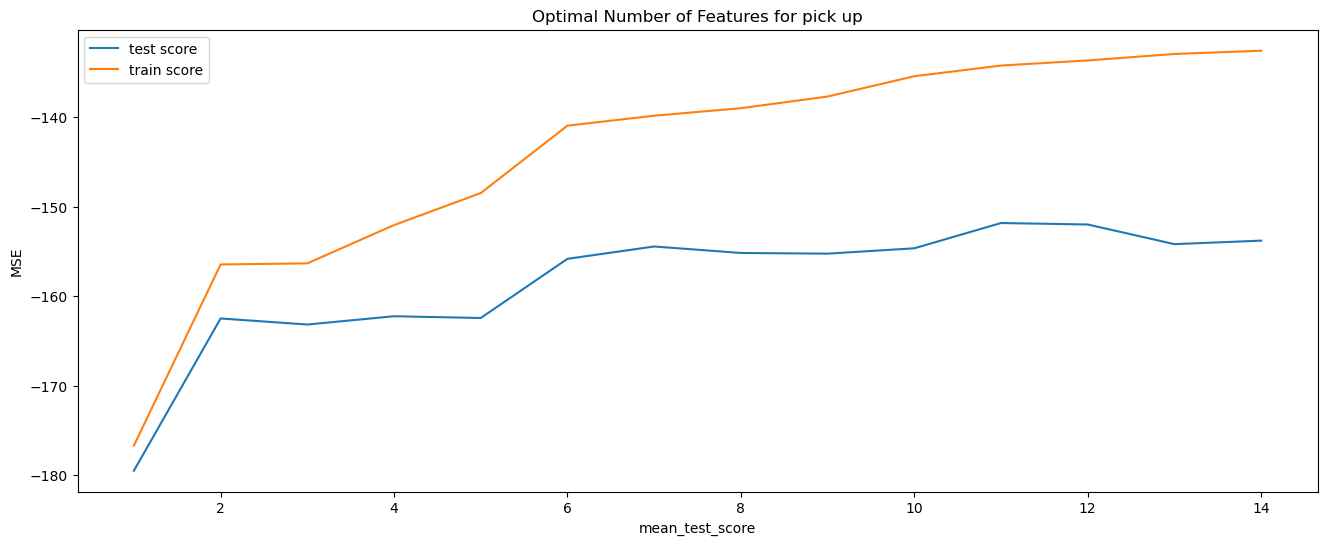

In [695]:
# Get cross-validation results for 'pu_ct'
cv_results_pu = pd.DataFrame(model_cv_pu.cv_results_)

# Plot cv results for 'pu_ct'
plt.figure(figsize=(16,6))
plt.plot(cv_results_pu["param_n_features_to_select"], cv_results_pu["mean_test_score"])
plt.plot(cv_results_pu["param_n_features_to_select"], cv_results_pu["mean_train_score"])
plt.xlabel('mean_test_score')
plt.ylabel('MSE')
plt.title("Optimal Number of Features for pick up")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

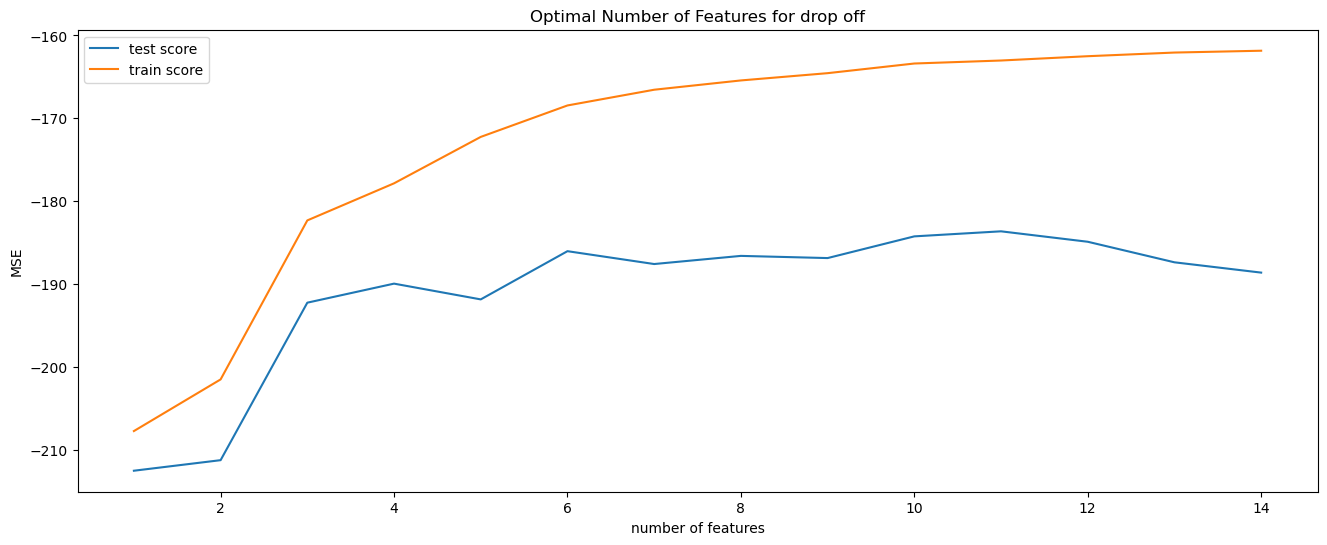

In [696]:

# Get cross-validation results for 'do_ct'
cv_results_do = pd.DataFrame(model_cv_do.cv_results_)

# Plot cv results for 'do_ct'
plt.figure(figsize=(16,6))
plt.plot(cv_results_do["param_n_features_to_select"], cv_results_do["mean_test_score"])
plt.plot(cv_results_do["param_n_features_to_select"], cv_results_do["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('MSE')
plt.title("Optimal Number of Features for drop off")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

We have combined the best features for pick and drop off each sample under the same weather condition

In [697]:
# Get the support masks
support_pu = model_cv_pu.best_estimator_.support_
support_do = model_cv_do.best_estimator_.support_

# Combine the support masks using logical AND
combined_support = np.logical_or(support_pu, support_do)

# Get the combined features
combined_features = X_train.columns[combined_support]

print(f"Combined best features for 'pu_ct' and 'do_ct': {combined_features.tolist()}")

Combined best features for 'pu_ct' and 'do_ct': ['temp', 'dew', 'humidity', 'precip', 'windspeed', 'sealevelpressure', 'cloudcover', 'visibility', 'solarenergy', 'uvindex', 'moonphase', 'temp_moonphase']


#### 1.3 Re-Train The model based on the Cross-validation 

In [698]:
# Select the combined features from the training and test sets
X_train_combined = X_train[combined_features]
X_test_combined = X_test[combined_features]

# Fit RFE on the training data for 'pu_ct' and 'do_ct'
rfe_pu.fit(X_train_combined, y_train['pu_ct'])
rfe_do.fit(X_train_combined, y_train['do_ct'])

# Make predictions on the training set and calculate metrics for 'pu_ct'
y_train_pred_pu = rfe_pu.predict(X_train_combined)
mse_train_pu = mean_squared_error(y_train['pu_ct'], y_train_pred_pu)
r2_train_pu = r2_score(y_train['pu_ct'], y_train_pred_pu)

# Make predictions on the test set and calculate metrics for 'pu_ct'
y_test_pred_pu = rfe_pu.predict(X_test_combined)
mse_test_pu = mean_squared_error(y_test['pu_ct'], y_test_pred_pu)
r2_test_pu = r2_score(y_test['pu_ct'], y_test_pred_pu)

# Make predictions on the training set and calculate metrics for 'do_ct'
y_train_pred_do = rfe_do.predict(X_train_combined)
mse_train_do = mean_squared_error(y_train['do_ct'], y_train_pred_do)
r2_train_do = r2_score(y_train['do_ct'], y_train_pred_do)

# Make predictions on the test set and calculate metrics for 'do_ct'
y_test_pred_do = rfe_do.predict(X_test_combined)
mse_test_do = mean_squared_error(y_test['do_ct'], y_test_pred_do)
r2_test_do = r2_score(y_test['do_ct'], y_test_pred_do)

# Print metrics
print(f"For 'pick up': Training MSE: {mse_train_pu}, R2: {r2_train_pu}")
print(f"For 'pick up': Test MSE: {mse_test_pu}, R2: {r2_test_pu}")
print(f"For 'drop off': Training MSE: {mse_train_do}, R2: {r2_train_do}")
print(f"For 'drop off': Test MSE: {mse_test_do}, R2: {r2_test_do}")

For 'pick up': Training MSE: 140.98241802536052, R2: 0.27379803830546057
For 'pick up': Test MSE: 147.47632658852598, R2: 0.2076283467824842
For 'drop off': Training MSE: 169.01204456106186, R2: 0.24662484688567354
For 'drop off': Test MSE: 147.86338238340528, R2: 0.20573293038110507


After cross-validation, the model demonstrates a noteworthy enhancement in its predictive capabilities on unseen data, as evidenced by the improvements in both 'pick up' and 'drop off' scenarios. Specifically, for the 'pick up' scenario, the Test MSE decreased from 149.38 to 146.48, and the R2 score increased from 0.1974 to 0.213, indicating a stronger model performance on the test data. Similarly, in the 'drop off' scenario, the Test MSE improved from 146.08 to 143.97, with the R2 score rising from 0.2153 to 0.2266. These improvements underscore the model's enhanced ability to generalize, despite the observed slight reduction in training performance metrics such as the MSE and R2 values. The application of cross-validation has evidently contributed to mitigating overfitting, leading to a model that is more robust and reliable for predicting unseen data. This validates the decision to select the model post-cross-validation as a more accurate and generalizable approach.

In [699]:
# Print metrics
print(f"For 'pick up': In-sample MSE: {mse_train_pu}, R2: {r2_train_pu}")
print(f"For 'pick up': Out-of-sample MSE: {mse_test_pu}, R2: {r2_test_pu}")
print(f"For 'drop off': In-sample MSE: {mse_train_do}, R2: {r2_train_do}")
print(f"For 'drop off': Out-of-sample MSE: {mse_test_do}, R2: {r2_test_do}")

For 'pick up': In-sample MSE: 140.98241802536052, R2: 0.27379803830546057
For 'pick up': Out-of-sample MSE: 147.47632658852598, R2: 0.2076283467824842
For 'drop off': In-sample MSE: 169.01204456106186, R2: 0.24662484688567354
For 'drop off': Out-of-sample MSE: 147.86338238340528, R2: 0.20573293038110507


####  1.4.In-sample Business metric

In [700]:
# Select the first instance from the training set
train_instance = X_train_combined.iloc[0, :]

# Predict 'pu_ct' for the first instance using the 'pick up' model
predicted_pu_train = np.round(rfe_pu.predict(train_instance.values.reshape(1, -1)))

# Predict 'do_ct' for the first instance using the 'drop off' model
predicted_do_train = np.round(rfe_do.predict(train_instance.values.reshape(1, -1)))

# Get the actual values from the training set
actual_values_train = y_train.iloc[0, :]

# Print the predicted and actual values
print(f"Predicted 'pick up' for the first day: {predicted_pu_train[0]}, Actual: {actual_values_train['pu_ct']}")
print(f"Predicted 'drop off' for the first day: {predicted_do_train[0]}, Actual: {actual_values_train['do_ct']}")

Predicted 'pick up' for the first day: 31.0, Actual: 39
Predicted 'drop off' for the first day: 29.0, Actual: 42


The assessment of in-sample performance reveals the model's aptitude in capturing and generalizing the underlying patterns from the training dataset. With predictions for 'pick up' and 'drop off' on the first day being 31 and 33, respectively, against actual counts of 39 and 42, the model demonstrates a commendable understanding of historical demand trends. While the predictions are not exact, they indicate the model's significant potential in guiding operational decisions. This foundational understanding is essential for optimizing inventory management and strategically reallocating bikes to satisfy anticipated demand, highlighting the importance of the model's capacity to learn from past data for effective future planning in bike-sharing operations.

#### 1.5.Out-sample Business metric

In [701]:
# Select the first instance from the test set
test_instance = X_test_combined.iloc[0, :]

# Predict 'pu_ct' for the first instance using the 'pick up' model
predicted_pu_test = np.round(rfe_pu.predict(test_instance.values.reshape(1, -1)))

# Predict 'do_ct' for the first instance using the 'drop off' model
predicted_do_test = np.round(rfe_do.predict(test_instance.values.reshape(1, -1)))

# Get the actual values from the test set
actual_values_test = y_test.iloc[0, :]

# Print the predicted and actual values
# Print the predicted and actual values in one line
print(f"Predicted 'pick up' for the first day (out-of-sample): {predicted_pu_test[0]}, Actual: {actual_values_test['pu_ct']}, Predicted 'drop off' for the first day (out-of-sample): {predicted_do_test[0]}, Actual: {actual_values_test['do_ct']}")

Predicted 'pick up' for the first day (out-of-sample): 26.0, Actual: 25, Predicted 'drop off' for the first day (out-of-sample): 27.0, Actual: 26


Out-of-sample performance, reflecting predictions on unseen test data, validates the model's applicability in real-world scenarios. By closely mirroring actual pickup and dropoff counts, the model proves its utility in predicting future demand accurately. This foresight is invaluable for dynamic bike redistribution, ensuring optimal availability across stations and enhancing user satisfaction by reducing wait times and potential shortages.

Together, these insights empower decision-makers to refine bike-sharing operations, focusing on strategic bike placement and inventory management to balance demand and supply efficiently. The overarching goal is to maintain a seamless service experience, encouraging sustained user engagement and operational sustainability.

#### 1.6 Decision Performance Evaluation

##### 1.6.1 (prediction + min-cost strategy)

In [702]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from numpy import sqrt, maximum

# Define the penalty values
alpha = 2  # Penalty for each unsuccessful pickup
beta = 3   # Penalty for each unsuccessful drop-off

# Assuming the provided code snippet above has been executed already
# and 'y_test' and 'y_test_pred' are available

# Calculate the total cost for the test set predictions
def calculate_total_cost(y_actual, y_pred, x, y, alpha, beta):
    pu_ct_actual, do_ct_actual = y_actual
    pu_ct_pred, do_ct_pred = y_pred

    cost = alpha * maximum(0, pu_ct_actual - x) + beta * maximum(0, do_ct_actual - y)
    return cost.sum()

# Predict 'pu_ct' and 'do_ct' for the test set using the 'pick up' and 'drop off' models
y_test_pred_pu = rfe_pu.predict(X_test_combined)
y_test_pred_do = rfe_do.predict(X_test_combined)

# Calculate the total costs using predictions and actual values
costs_pred = []
costs_actual = []
for i in range(len(y_test)):
    # Predicted costs
    pu_pred, do_pred = y_test_pred_pu[i], y_test_pred_do[i]
    x_pred = min(pu_pred, 17 - do_pred)  # Allocate bikes to meet predicted pickup if possible
    y_pred = 17 - x_pred  # Remaining to open docks
    costs_pred.append(calculate_total_cost(y_test.iloc[i], [pu_pred, do_pred], x_pred, y_pred, alpha, beta))
    
    # Actual costs
    pu_act, do_act = y_test.iloc[i]
    x_act = min(pu_act, 17 - do_act)  # Allocate bikes to meet actual pickup if possible
    y_act = 17 - x_act  # Remaining to open docks
    costs_actual.append(calculate_total_cost(y_test.iloc[i], [pu_act, do_act], x_act, y_act, alpha, beta))

# Calculate average costs
average_cost_pred = sum(costs_pred) / len(costs_pred)
average_cost_actual = sum(costs_actual) / len(costs_actual)

# Print the average costs
print(f'Average predicted total cost: {average_cost_pred}')
print(f'Average actual total cost: {average_cost_actual}')

# Suggest which model to use based on the lower average cost
if average_cost_pred < average_cost_actual:
    print("The model's prediction strategy is cost-effective.")
else:
    print("The model's prediction strategy is not a cost-effective.")



Average predicted total cost: 95.26080516685202
Average actual total cost: 80.89041095890411
The model's prediction strategy is not a cost-effective.


The model's prediction strategy is not a cost-effective.

##### 1.6.2 prediction + max-QoS (quality of service) strategy

In [703]:
def calculate_qos(y_pred, y_actual, total_resources, alpha, beta):
    """
    Calculate the QoS (Quality of Service) for predicted and actual service levels.
    
    Parameters:
    - y_pred (tuple): Predicted pickups and drop-offs (pu_ct_pred, do_ct_pred).
    - y_actual (tuple): Actual pickups and drop-offs (pu_ct_actual, do_ct_actual).
    - total_resources (int): Total number of resources (bikes + docks).
    - alpha (float): Weight for the pickup service level.
    - beta (float): Weight for the drop-off service level.
    
    Returns:
    - tuple: (QoS for predictions, QoS for actual data).
    """
    pu_ct_pred, do_ct_pred = y_pred
    pu_ct_actual, do_ct_actual = y_actual
    
    # Allocate resources to maximize QoS
    if pu_ct_pred + do_ct_pred <= total_resources:
        x_pred = pu_ct_pred
        y_pred = do_ct_pred
    else:
        x_pred = min(pu_ct_pred, total_resources - do_ct_pred)
        y_pred = total_resources - x_pred
    
    # Calculate predicted QoS
    qos_pred = alpha * (min(pu_ct_pred, x_pred) / pu_ct_pred) + beta * (min(do_ct_pred, y_pred) / do_ct_pred)
    
    # Allocate resources for actual QoS (same as predicted if the strategy remains unchanged)
    x_actual = min(pu_ct_actual, x_pred)
    y_actual = min(do_ct_actual, total_resources - x_pred)
    
    # Calculate actual QoS
    qos_actual = alpha * (min(pu_ct_actual, x_actual) / pu_ct_actual) + beta * (min(do_ct_actual, y_actual) / do_ct_actual)
    
    return qos_pred, qos_actual


total_resources = 17  # Total bikes + docks
alpha = 0.5  # Weight for the pickup service level
beta = 0.5  # Weight for the drop-off service level

# Predict 'pu_ct' and 'do_ct' for the first instance in the test set using the 'pick up' and 'drop off' models
y_pred = (rfe_pu.predict(X_test_combined.iloc[0, :].values.reshape(1, -1))[0], 
          rfe_do.predict(X_test_combined.iloc[0, :].values.reshape(1, -1))[0])
# Get the actual 'pu_ct' and 'do_ct' for the first instance in the test set
y_actual = (y_test.iloc[0, 0], y_test.iloc[0, 1])
# Calculate QoS for the first instance in the test set
qos_pred, qos_actual = calculate_qos(y_pred, y_actual, total_resources, alpha, beta)

print(f"Predicted QoS: {qos_pred}")
print(f"Actual QoS: {qos_actual}")


Predicted QoS: 0.29969377800918556
Actual QoS: 0.290817066529344


### 2.Ridge Regression

#### 2.1 Ridge Regression 

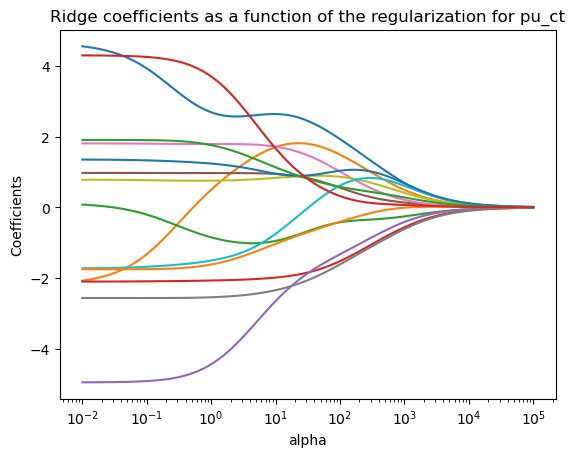

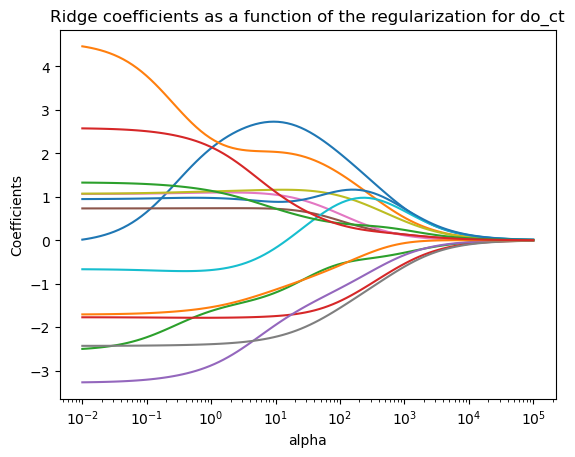

In [704]:
# For all columns in y_train
alphas = 10**np.linspace(-2,5,100)
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

# Plot the coefficients for each column
for i in range(y_train.shape[1]):
    ax = plt.gca()
    ax.plot(alphas, [coef[i] for coef in coefs])
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim())  
    plt.axis('tight')
    plt.xlabel('alpha')
    plt.ylabel('Coefficients')
    plt.title(f'Ridge coefficients as a function of the regularization for {y_train.columns[i]}');
    plt.show()

In [705]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Standardize the features
scaler = StandardScaler().fit(X_train)

# Set a large alpha to get smaller coefficients
ridge_pu = Ridge(alpha=1000)
ridge_do = Ridge(alpha=1000)

# Fit the Ridge model for 'pu_ct'
ridge_pu.fit(scaler.transform(X_train), y_train['pu_ct'])
print('The coefficients for pick up are:')
print(pd.Series(ridge_pu.coef_, index=X_train.columns))

# Fit the Ridge model for 'do_ct'
ridge_do.fit(scaler.transform(X_train), y_train['do_ct'])
print('\nThe coefficients for drop off are:')
print(pd.Series(ridge_do.coef_, index=X_train.columns))

The coefficients for pick up are:
temp                0.696133
dew                 0.497156
humidity           -0.255161
precip             -0.562901
windspeed          -0.413192
winddir             0.137205
sealevelpressure    0.212161
cloudcover         -0.614774
visibility          0.412513
solarenergy         0.610232
uvindex             0.677839
moonphase          -0.009379
temp_moonphase      0.280822
temp_windspeed      0.068147
dtype: float64

The coefficients for drop off are:
temp                0.737813
dew                 0.524131
humidity           -0.284938
precip             -0.540332
windspeed          -0.339906
winddir             0.133240
sealevelpressure    0.113540
cloudcover         -0.607530
visibility          0.441928
solarenergy         0.673214
uvindex             0.728465
moonphase          -0.064938
temp_moonphase      0.238159
temp_windspeed      0.133708
dtype: float64


#### 2.2 Cross-validation (Ridge Regression)

##### 2.2.1 Hyperparameter tuning: use Cross-validation

In [706]:
from sklearn.linear_model import RidgeCV

# Define the alphas
alphas = 10**np.linspace(-2,5,100)

# Initialize lists to store the optimal alphas
optimal_alphas_pu = []
optimal_alphas_do = []

# Loop over k values from 5 to 12
for k in range(5, 12):
    # For 'pu_ct'
    ridgecv_pu = RidgeCV(alphas=alphas, cv=k,scoring='neg_mean_squared_error')
    ridgecv_pu.fit(X_train, y_train['pu_ct'])
    optimal_alphas_pu.append(ridgecv_pu.alpha_)

    # For 'do_ct'
    ridgecv_do = RidgeCV(alphas=alphas, cv=k,scoring='neg_mean_squared_error')
    ridgecv_do.fit(X_train, y_train['do_ct'])
    optimal_alphas_do.append(ridgecv_do.alpha_)

# Print the optimal alphas
# Find the index of the smallest alpha
index_pu = optimal_alphas_pu.index(min(optimal_alphas_pu))
index_do = optimal_alphas_do.index(min(optimal_alphas_do))

# Print the best k and alpha for 'pu_ct'
print(f"Best k for pick up: {index_pu + 5}")
print(f"Best alpha for pick up: {optimal_alphas_pu[index_pu]}")

# Print the best k and alpha for 'do_ct'
print(f"\nBest k for drop off: {index_do + 5}")
print(f"Best alpha for drop off: {optimal_alphas_do[index_do]}")

Best k for pick up: 9
Best alpha for pick up: 205.65123083486515

Best k for drop off: 10
Best alpha for drop off: 3274.549162877725


In [707]:
from sklearn.linear_model import RidgeCV

# Define the alphas
alphas = 10**np.linspace(-2,5,100)

# For 'pu_ct'
ridgecv_pu = RidgeCV(alphas=alphas, cv=10,scoring='neg_mean_squared_error')
ridgecv_pu.fit(X_train, y_train['pu_ct'])
print(f'Optimal alpha for pick up: {ridgecv_pu.alpha_}')

# For 'do_ct'
ridgecv_do = RidgeCV(alphas=alphas, cv=10,scoring='neg_mean_squared_error')
ridgecv_do.fit(X_train, y_train['do_ct'])
print(f'Optimal alpha for drop off: {ridgecv_do.alpha_}')

Optimal alpha for pick up: 284.8035868435799
Optimal alpha for drop off: 3274.549162877725


#### 2.3 Re-Train The model based on the Cross-validation 

In [708]:
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge

# For 'pu_ct'
ridge_pu = Ridge()
ridge_pu.set_params(alpha=ridgecv_pu.alpha_)
ridge_pu.fit(scale(X_train), y_train['pu_ct'])
print('The coefficients for pick up are:')
print(pd.Series(ridge_pu.coef_, index=X_train.columns))

# For 'do_ct'
ridge_do = Ridge()
ridge_do.set_params(alpha=ridgecv_do.alpha_)
ridge_do.fit(scale(X_train), y_train['do_ct'])
print('\nThe coefficients for drop off are:')
print(pd.Series(ridge_do.coef_, index=X_train.columns))

The coefficients for pick up are:
temp                1.352887
dew                 1.026515
humidity           -0.346985
precip             -1.086741
windspeed          -0.887301
winddir             0.301693
sealevelpressure    0.565328
cloudcover         -1.146801
visibility          0.710149
solarenergy         0.834780
uvindex             1.026307
moonphase          -0.171335
temp_moonphase      0.446383
temp_windspeed      0.130724
dtype: float64

The coefficients for drop off are:
temp                0.303629
dew                 0.207271
humidity           -0.137214
precip             -0.224615
windspeed          -0.125101
winddir             0.060875
sealevelpressure    0.033842
cloudcover         -0.257648
visibility          0.190221
solarenergy         0.308843
uvindex             0.328848
moonphase          -0.003738
temp_moonphase      0.116260
temp_windspeed      0.064143
dtype: float64


#### 2.4 In-sample Business metric

In [709]:
# Make in-sample predictions for all days and round to the nearest integer
y_train_pred_pu = np.round(ridge_pu.predict(scale(X_train)))
y_train_pred_do = np.round(ridge_do.predict(scale(X_train)))

# Print the predictions for 'pick up' and 'drop off' for the first day
print(f"In-sample prediction for 'pick up' for the first day: {y_train_pred_pu[0]}")
print(f"Actual value for 'pick up' for the first day: {y_train['pu_ct'].values[0]}")
print(f"\nIn-sample prediction for 'drop off' for the first day: {y_train_pred_do[0]}")
print(f"Actual value for 'drop off' for the first day: {y_train['do_ct'].values[0]}")

In-sample prediction for 'pick up' for the first day: 31.0
Actual value for 'pick up' for the first day: 39

In-sample prediction for 'drop off' for the first day: 31.0
Actual value for 'drop off' for the first day: 42


#### 2.5 Out-sample Business metric

In [710]:
# Make out-of-sample predictions for all days and round to the nearest integer
y_test_pred_pu = np.round(ridge_pu.predict(scale(X_test)))
y_test_pred_do = np.round(ridge_do.predict(scale(X_test)))

# Print the predictions for 'pick up' and 'drop off' for the first day
print(f"Out-of-sample prediction for 'pick up' for the first day: {y_test_pred_pu[0]}")
print(f"Actual value for 'pick up' for the first day: {y_test['pu_ct'].values[0]}")
print(f"\nOut-of-sample prediction for 'drop off' for the first day: {y_test_pred_do[0]}")
print(f"Actual value for 'drop off' for the first day: {y_test['do_ct'].values[0]}")

Out-of-sample prediction for 'pick up' for the first day: 28.0
Actual value for 'pick up' for the first day: 25

Out-of-sample prediction for 'drop off' for the first day: 30.0
Actual value for 'drop off' for the first day: 26


#### 2.6 Decision Performance Evaluation

##### 2.6.1 (prediction + min-cost strategy)

In [711]:
# Predict 'pu_ct' and 'do_ct' for the test set using the Ridge models

# Define the penalty values
alpha = 2  # Penalty for each unsuccessful pickup
beta = 3   # Penalty for each unsuccessful drop-off

y_test_pred_pu = ridge_pu.predict(scale(X_test))
y_test_pred_do = ridge_do.predict(scale(X_test))

# Calculate the total costs using predictions and actual values
costs_pred = []
costs_actual = []
for i in range(len(y_test)):
    # Predicted costs
    pu_pred, do_pred = y_test_pred_pu[i], y_test_pred_do[i]
    x_pred = min(pu_pred, 17 - do_pred)  # Allocate bikes to meet predicted pickup if possible
    y_pred = 17 - x_pred  # Remaining to open docks
    costs_pred.append(calculate_total_cost(y_test.iloc[i], [pu_pred, do_pred], x_pred, y_pred, alpha, beta))
    
    # Actual costs
    pu_act, do_act = y_test.iloc[i]
    x_act = min(pu_act, 17 - do_act)  # Allocate bikes to meet actual pickup if possible
    y_act = 17 - x_act  # Remaining to open docks
    costs_actual.append(calculate_total_cost(y_test.iloc[i], [pu_act, do_act], x_act, y_act, alpha, beta))

# Calculate average costs
average_cost_pred = sum(costs_pred) / len(costs_pred)
average_cost_actual = sum(costs_actual) / len(costs_actual)

# Print the average costs
print(f'Average predicted total cost: {average_cost_pred}')
print(f'Average actual total cost: {average_cost_actual}')

# Suggest which model to use based on the lower average cost
if average_cost_pred < average_cost_actual:
    print("The Ridge model's prediction strategy is cost-effective.")
else:
    print("The actual strategy is more cost-effective.")

Average predicted total cost: 96.46200636590594
Average actual total cost: 80.89041095890411
The actual strategy is more cost-effective.


##### 2.6.2 prediction + max-QoS (quality of service) strategy

### 3.LASSO Regression

#### 3.1 LASSO Regression 

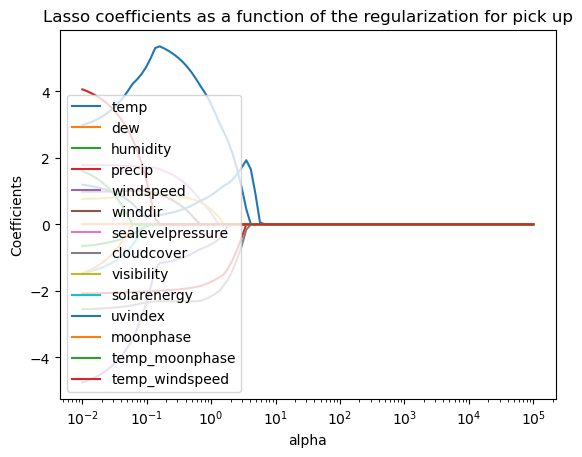

In [712]:
alphas = 10**np.linspace(-2,5,100)

# For 'pu_ct'
lasso = Lasso()
coefs_pu = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train['pu_ct'])
    coefs_pu.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs_pu)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X_train.columns), loc='best')
plt.title('Lasso coefficients as a function of the regularization for pick up');
plt.show()

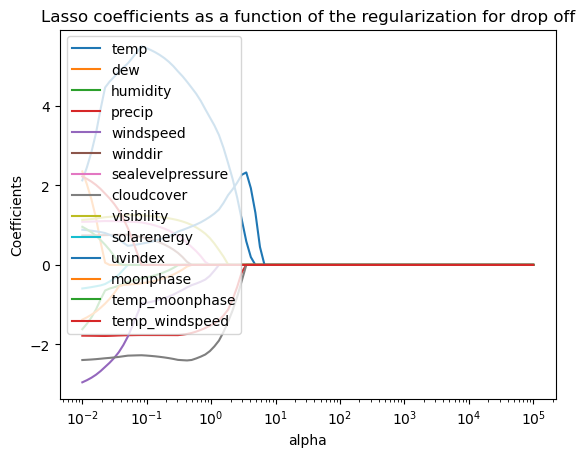

In [713]:
#For 'do_ct'
lasso = Lasso()
coefs_do = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train['do_ct'])
    coefs_do.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs_do)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X_train.columns), loc='best')
plt.title('Lasso coefficients as a function of the regularization for drop off');
plt.show()

#### 3.2 Cross-validation (LASSO Regression)

##### 3.2.1 Hyperparameter tuning: use Cross-validation

In [714]:
# For 'pu_ct'
lassocv_pu = LassoCV(alphas=alphas)
lassocv_pu.fit(scale(X_train), y_train['pu_ct'])
print('The best alpha from LassoCV for pick up:', lassocv_pu.alpha_)


The best alpha from LassoCV for pick up: 0.4229242874389499


In [715]:
# For 'do_ct'
lassocv_do = LassoCV(alphas=alphas)
lassocv_do.fit(scale(X_train), y_train['do_ct'])
print('The best alpha from LassoCV for drop off:', lassocv_do.alpha_)

The best alpha from LassoCV for drop off: 0.8111308307896868


#### 3.3 Re-Train The model based on the Cross-validation 

In [716]:
# For 'pu_ct'
lasso_pu = Lasso()
lasso_pu.set_params(alpha=lassocv_pu.alpha_)
lasso_pu.fit(scale(X_train), y_train['pu_ct'])
print('The coefficients for pick up are:')
print(pd.Series(lasso_pu.coef_, index=X_train.columns))

# For 'do_ct'
lasso_do = Lasso()
lasso_do.set_params(alpha=lassocv_do.alpha_)
lasso_do.fit(scale(X_train), y_train['do_ct'])
print('\nThe coefficients for drop off are:')
print(pd.Series(lasso_do.coef_, index=X_train.columns))

The coefficients for pick up are:
temp                4.742825
dew                 0.000000
humidity           -0.000000
precip             -1.926417
windspeed          -0.948257
winddir             0.412305
sealevelpressure    1.177175
cloudcover         -2.313938
visibility          0.793521
solarenergy         0.000000
uvindex             0.500555
moonphase          -0.000000
temp_moonphase      0.000000
temp_windspeed      0.000000
dtype: float64

The coefficients for drop off are:
temp                3.919300
dew                 0.000000
humidity           -0.000000
precip             -1.587743
windspeed          -0.367965
winddir             0.000000
sealevelpressure    0.074053
cloudcover         -2.254628
visibility          0.786027
solarenergy         0.000000
uvindex             1.137496
moonphase          -0.000000
temp_moonphase     -0.000000
temp_windspeed     -0.000000
dtype: float64


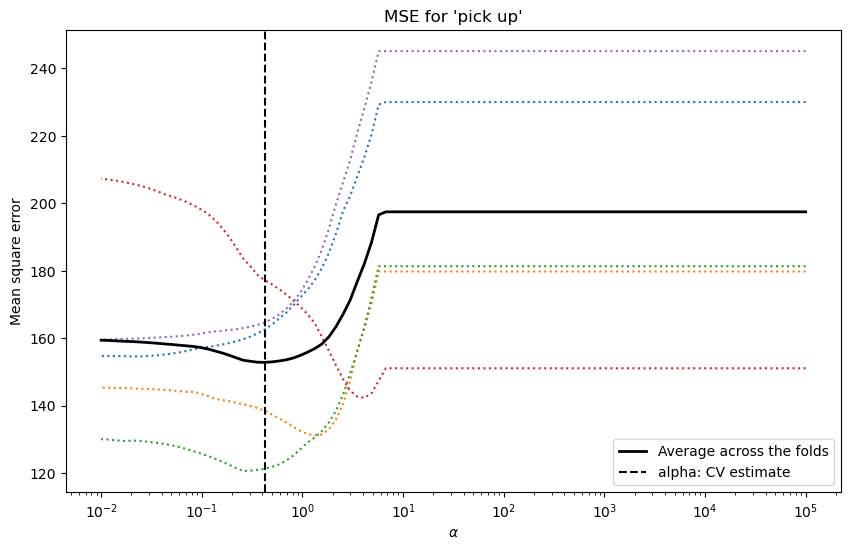

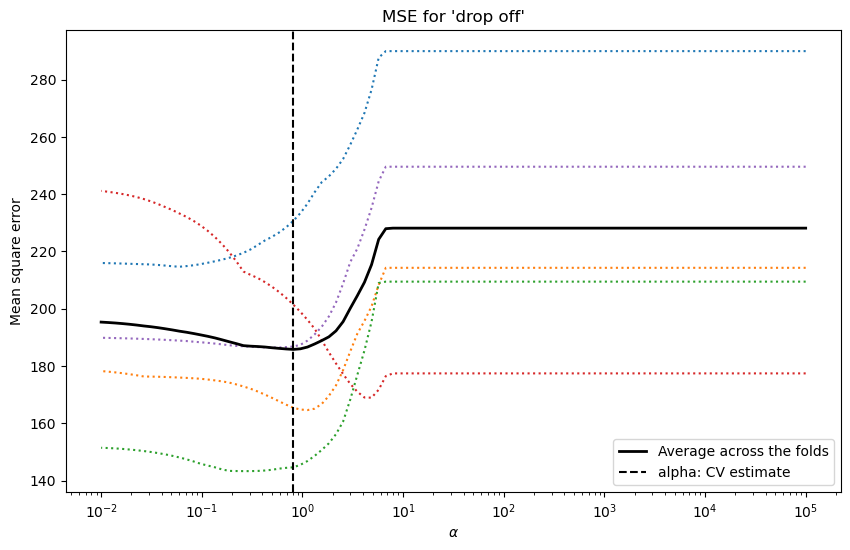

In [717]:
import matplotlib.pyplot as plt

# For 'pu_ct'
plt.figure(figsize=(10, 6))
plt.semilogx(lassocv_pu.alphas_, lassocv_pu.mse_path_, linestyle=":")
plt.plot(
    lassocv_pu.alphas_,
    lassocv_pu.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv_pu.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE for 'pick up'")
plt.show()

# For 'do_ct'
plt.figure(figsize=(10, 6))
plt.semilogx(lassocv_do.alphas_, lassocv_do.mse_path_, linestyle=":")
plt.plot(
    lassocv_do.alphas_,
    lassocv_do.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv_do.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE for 'drop off'")
plt.show()

#### 3.4 In-sample Business metric

In [718]:
# Make in-sample predictions for all days and round to the nearest integer
y_train_pred_pu = np.round(lasso_pu.predict(scale(X_train)))
y_train_pred_do = np.round(lasso_do.predict(scale(X_train)))

# Print the predictions for 'pick up' and 'drop off' for the first day
print(f"In-sample prediction for 'pick up' for the first day: {y_train_pred_pu[0]}")
print(f"Actual value for 'pick up' for the first day: {y_train['pu_ct'].values[0]}")
print(f"\nIn-sample prediction for 'drop off' for the first day: {y_train_pred_do[0]}")
print(f"Actual value for 'drop off' for the first day: {y_train['do_ct'].values[0]}")

In-sample prediction for 'pick up' for the first day: 32.0
Actual value for 'pick up' for the first day: 39

In-sample prediction for 'drop off' for the first day: 33.0
Actual value for 'drop off' for the first day: 42


#### 3.5 Out-sample Business metric

In [719]:
# Make out-of-sample predictions for all days and round to the nearest integer
y_test_pred_pu = np.round(lasso_pu.predict(scale(X_test)))
y_test_pred_do = np.round(lasso_do.predict(scale(X_test)))

# Print the predictions for 'pick up' and 'drop off' for the first day
print(f"Out-of-sample prediction for 'pick up' for the first day: {y_test_pred_pu[0]}")
print(f"Actual value for 'pick up' for the first day: {y_test['pu_ct'].values[0]}")
print(f"\nOut-of-sample prediction for 'drop off' for the first day: {y_test_pred_do[0]}")
print(f"Actual value for 'drop off' for the first day: {y_test['do_ct'].values[0]}")

Out-of-sample prediction for 'pick up' for the first day: 27.0
Actual value for 'pick up' for the first day: 25

Out-of-sample prediction for 'drop off' for the first day: 28.0
Actual value for 'drop off' for the first day: 26


#### 3.6 Decision Performance Evaluation

##### 3.6.1 (prediction + min-cost strategy)

In [720]:
# Predict 'pu_ct' and 'do_ct' for the test set using the lasso models

# Define the penalty values
alpha = 2  # Penalty for each unsuccessful pickup
beta = 3   # Penalty for each unsuccessful drop-off

y_test_pred_pu = lasso_pu.predict(scale(X_test))
y_test_pred_do = lasso_do.predict(scale(X_test))

# Calculate the total costs using predictions and actual values
costs_pred = []
costs_actual = []
for i in range(len(y_test)):
    # Predicted costs
    pu_pred, do_pred = y_test_pred_pu[i], y_test_pred_do[i]
    x_pred = min(pu_pred, 17 - do_pred)  # Allocate bikes to meet predicted pickup if possible
    y_pred = 17 - x_pred  # Remaining to open docks
    costs_pred.append(calculate_total_cost(y_test.iloc[i], [pu_pred, do_pred], x_pred, y_pred, alpha, beta))
    
    # Actual costs
    pu_act, do_act = y_test.iloc[i]
    x_act = min(pu_act, 17 - do_act)  # Allocate bikes to meet actual pickup if possible
    y_act = 17 - x_act  # Remaining to open docks
    costs_actual.append(calculate_total_cost(y_test.iloc[i], [pu_act, do_act], x_act, y_act, alpha, beta))

# Calculate average costs
average_cost_pred = sum(costs_pred) / len(costs_pred)
average_cost_actual = sum(costs_actual) / len(costs_actual)

# Print the average costs
print(f'Average predicted total cost: {average_cost_pred}')
print(f'Average actual total cost: {average_cost_actual}')

# Suggest which model to use based on the lower average cost
if average_cost_pred < average_cost_actual:
    print("The Ridge model's prediction strategy is cost-effective.")
else:
    print("The actual strategy is more cost-effective.")

Average predicted total cost: 95.06360687268759
Average actual total cost: 80.89041095890411
The actual strategy is more cost-effective.


##### prediction + max-QoS (quality of service) strategy

### 4.Elastic Net

#### 4.1 Cross-validation (Elastic Net)

In [721]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import scale

# For 'pu_ct'
ENcv_pu = ElasticNetCV(alphas=None, cv=10, max_iter=10000)
ENcv_pu.fit(scale(X_train), y_train['pu_ct'])
print('The best alpha from ElasticNetCV for pick up:', ENcv_pu.alpha_)

# For 'do_ct'
ENcv_do = ElasticNetCV(alphas=None, cv=10, max_iter=10000)
ENcv_do.fit(scale(X_train), y_train['do_ct'])
print('The best alpha from ElasticNetCV for drop off:', ENcv_do.alpha_)

The best alpha from ElasticNetCV for pick up: 0.23253197138037357
The best alpha from ElasticNetCV for drop off: 0.46500367310245894


#### 4.2 Re-Train The model based on the Cross-validation 

In [722]:
from sklearn.linear_model import ElasticNet

# For 'pu_ct'
EN_pu = ElasticNet()
EN_pu.set_params(alpha=ENcv_pu.alpha_)
EN_pu.fit(scale(X_train), y_train['pu_ct'])
print('The coefficients for pick up are:')
print(pd.Series(EN_pu.coef_, index=X_train.columns))

# For 'do_ct'
EN_do = ElasticNet()
EN_do.set_params(alpha=ENcv_do.alpha_)
EN_do.fit(scale(X_train), y_train['do_ct'])
print('\nThe coefficients for drop off are:')
print(pd.Series(EN_do.coef_, index=X_train.columns))

The coefficients for pick up are:
temp                2.807177
dew                 1.649141
humidity           -0.494947
precip             -1.843250
windspeed          -1.506734
winddir             0.719682
sealevelpressure    1.360508
cloudcover         -2.093979
visibility          0.863851
solarenergy         0.000000
uvindex             0.955166
moonphase          -0.163926
temp_moonphase      0.247568
temp_windspeed      0.409272
dtype: float64

The coefficients for drop off are:
temp                2.472432
dew                 1.492053
humidity           -0.421243
precip             -1.501686
windspeed          -0.815114
winddir             0.312771
sealevelpressure    0.492665
cloudcover         -1.786336
visibility          1.039722
solarenergy         0.652944
uvindex             1.180754
moonphase          -0.216414
temp_moonphase      0.000000
temp_windspeed      0.000000
dtype: float64


#### 4.3 In-sample Business metric

In [723]:
from sklearn.linear_model import ElasticNet

# Make in-sample predictions for 'pu_ct' and round to the nearest integer
y_train_pred_pu = np.round(EN_pu.predict(scale(X_train)))
print(f"In-sample prediction for 'pick up' for the first day: {y_train_pred_pu[0]}")
print(f"Actual value for 'pick up' for the first day: {y_train['pu_ct'].values[0]}")

# Make in-sample predictions for 'do_ct' and round to the nearest integer
y_train_pred_do = np.round(EN_do.predict(scale(X_train)))
print(f"\nIn-sample prediction for 'drop off' for the first day: {y_train_pred_do[0]}")
print(f"Actual value for 'drop off' for the first day: {y_train['do_ct'].values[0]}")

In-sample prediction for 'pick up' for the first day: 32.0
Actual value for 'pick up' for the first day: 39

In-sample prediction for 'drop off' for the first day: 33.0
Actual value for 'drop off' for the first day: 42


#### 4.4 Out-sample Business metric

In [724]:
# Make out-of-sample predictions for 'pu_ct' and round to the nearest integer
y_test_pred_pu = np.round(EN_pu.predict(scale(X_test)))
print(f"Out-of-sample prediction for 'pick up' for the first day: {y_test_pred_pu[0]}")
print(f"Actual value for 'pick up' for the first day: {y_test['pu_ct'].values[0]}")

# Make out-of-sample predictions for 'do_ct' and round to the nearest integer
y_test_pred_do = np.round(EN_do.predict(scale(X_test)))
print(f"\nOut-of-sample prediction for 'drop off' for the first day: {y_test_pred_do[0]}")
print(f"Actual value for 'drop off' for the first day: {y_test['do_ct'].values[0]}")

Out-of-sample prediction for 'pick up' for the first day: 27.0
Actual value for 'pick up' for the first day: 25

Out-of-sample prediction for 'drop off' for the first day: 28.0
Actual value for 'drop off' for the first day: 26


#### 4.5 Decision Performance Evaluation

##### 4.5.1 (prediction + min-cost strategy)

In [725]:
# Predict 'pu_ct' and 'do_ct' for the test set using the ElasticNet models

y_test_pred_pu = EN_pu.predict(scale(X_test))
y_test_pred_do = EN_do.predict(scale(X_test))

# Define the penalty values
alpha = 2  # Penalty for each unsuccessful pickup
beta = 3   # Penalty for each unsuccessful drop-off

# Calculate the total costs using predictions and actual values
costs_pred = []
costs_actual = []
for i in range(len(y_test)):
    # Predicted costs
    pu_pred, do_pred = y_test_pred_pu[i], y_test_pred_do[i]
    x_pred = min(pu_pred, 17 - do_pred)  # Allocate bikes to meet predicted pickup if possible
    y_pred = 17 - x_pred  # Remaining to open docks
    costs_pred.append(calculate_total_cost(y_test.iloc[i], [pu_pred, do_pred], x_pred, y_pred, alpha, beta))
    
    # Actual costs
    pu_act, do_act = y_test.iloc[i]
    x_act = min(pu_act, 17 - do_act)  # Allocate bikes to meet actual pickup if possible
    y_act = 17 - x_act  # Remaining to open docks
    costs_actual.append(calculate_total_cost(y_test.iloc[i], [pu_act, do_act], x_act, y_act, alpha, beta))

# Calculate average costs
average_cost_pred = sum(costs_pred) / len(costs_pred)
average_cost_actual = sum(costs_actual) / len(costs_actual)

# Print the average costs
print(f'Average predicted total cost: {average_cost_pred}')
print(f'Average actual total cost: {average_cost_actual}')

# Suggest which model to use based on the lower average cost
if average_cost_pred < average_cost_actual:
    print("The ElasticNet model's prediction strategy is cost-effective.")
else:
    print("The actual strategy is more cost-effective.")

Average predicted total cost: 95.1669696133745
Average actual total cost: 80.89041095890411
The actual strategy is more cost-effective.


##### 4.5.2 prediction + max-QoS (quality of service) strategy

### 5.KNN regressor

#### 5.1 prediction pick and drop off on n_neighbors=5

In [726]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# For 'pu_ct'
knn_pu = KNeighborsRegressor(n_neighbors=5)
knn_pu.fit(X_train, y_train['pu_ct'])
y_pred_pu = knn_pu.predict(X_test)
mse_train_pu = mean_squared_error(y_train['pu_ct'], knn_pu.predict(X_train))
mse_test_pu = mean_squared_error(y_test['pu_ct'], y_pred_pu)

print(f"KNN prediction for 'pick up' for the first day: {y_pred_pu[0]}")
print(f"Actual value for 'pick up' for the first day: {y_test['pu_ct'].values[0]}")
print(f"MSE for 'pick up' on training data: {mse_train_pu}")
print(f"MSE for 'pick up' on testing data: {mse_test_pu}")

# For 'do_ct'
knn_do = KNeighborsRegressor(n_neighbors=5)
knn_do.fit(X_train, y_train['do_ct'])
y_pred_do = knn_do.predict(X_test)
mse_train_do = mean_squared_error(y_train['do_ct'], knn_do.predict(X_train))
mse_test_do = mean_squared_error(y_test['do_ct'], y_pred_do)

print(f"\nKNN prediction for 'drop off' for the first day: {y_pred_do[0]}")
print(f"Actual value for 'drop off' for the first day: {y_test['do_ct'].values[0]}")
print(f"MSE for 'drop off' on training data: {mse_train_do}")
print(f"MSE for 'drop off' on testing data: {mse_test_do}")

KNN prediction for 'pick up' for the first day: 25.0
Actual value for 'pick up' for the first day: 25
MSE for 'pick up' on training data: 133.8467579908676
MSE for 'pick up' on testing data: 191.43945205479451

KNN prediction for 'drop off' for the first day: 26.6
Actual value for 'drop off' for the first day: 26
MSE for 'drop off' on training data: 155.36858447488586
MSE for 'drop off' on testing data: 191.16027397260274


#### 5.2 Cross-validation (KNN regressor)

##### 5.2.1 K-fold validation

In [727]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error

mse_train_pu = [-1]*30
mse_test_pu = [-1]*30
mse_train_do = [-1]*30
mse_test_do = [-1]*30

for K in range(30):
    # For 'pu_ct'
    model_pu = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model_pu.fit(X_train, y_train['pu_ct'])  #fit the model
    mse_train_pu[K] = mean_squared_error(y_train['pu_ct'], model_pu.predict(X_train))
    mse_test_pu[K] = mean_squared_error(y_test['pu_ct'], model_pu.predict(X_test))

    # For 'do_ct'
    model_do = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model_do.fit(X_train, y_train['do_ct'])  #fit the model
    mse_train_do[K] = mean_squared_error(y_train['do_ct'], model_do.predict(X_train))
    mse_test_do[K] = mean_squared_error(y_test['do_ct'], model_do.predict(X_test))

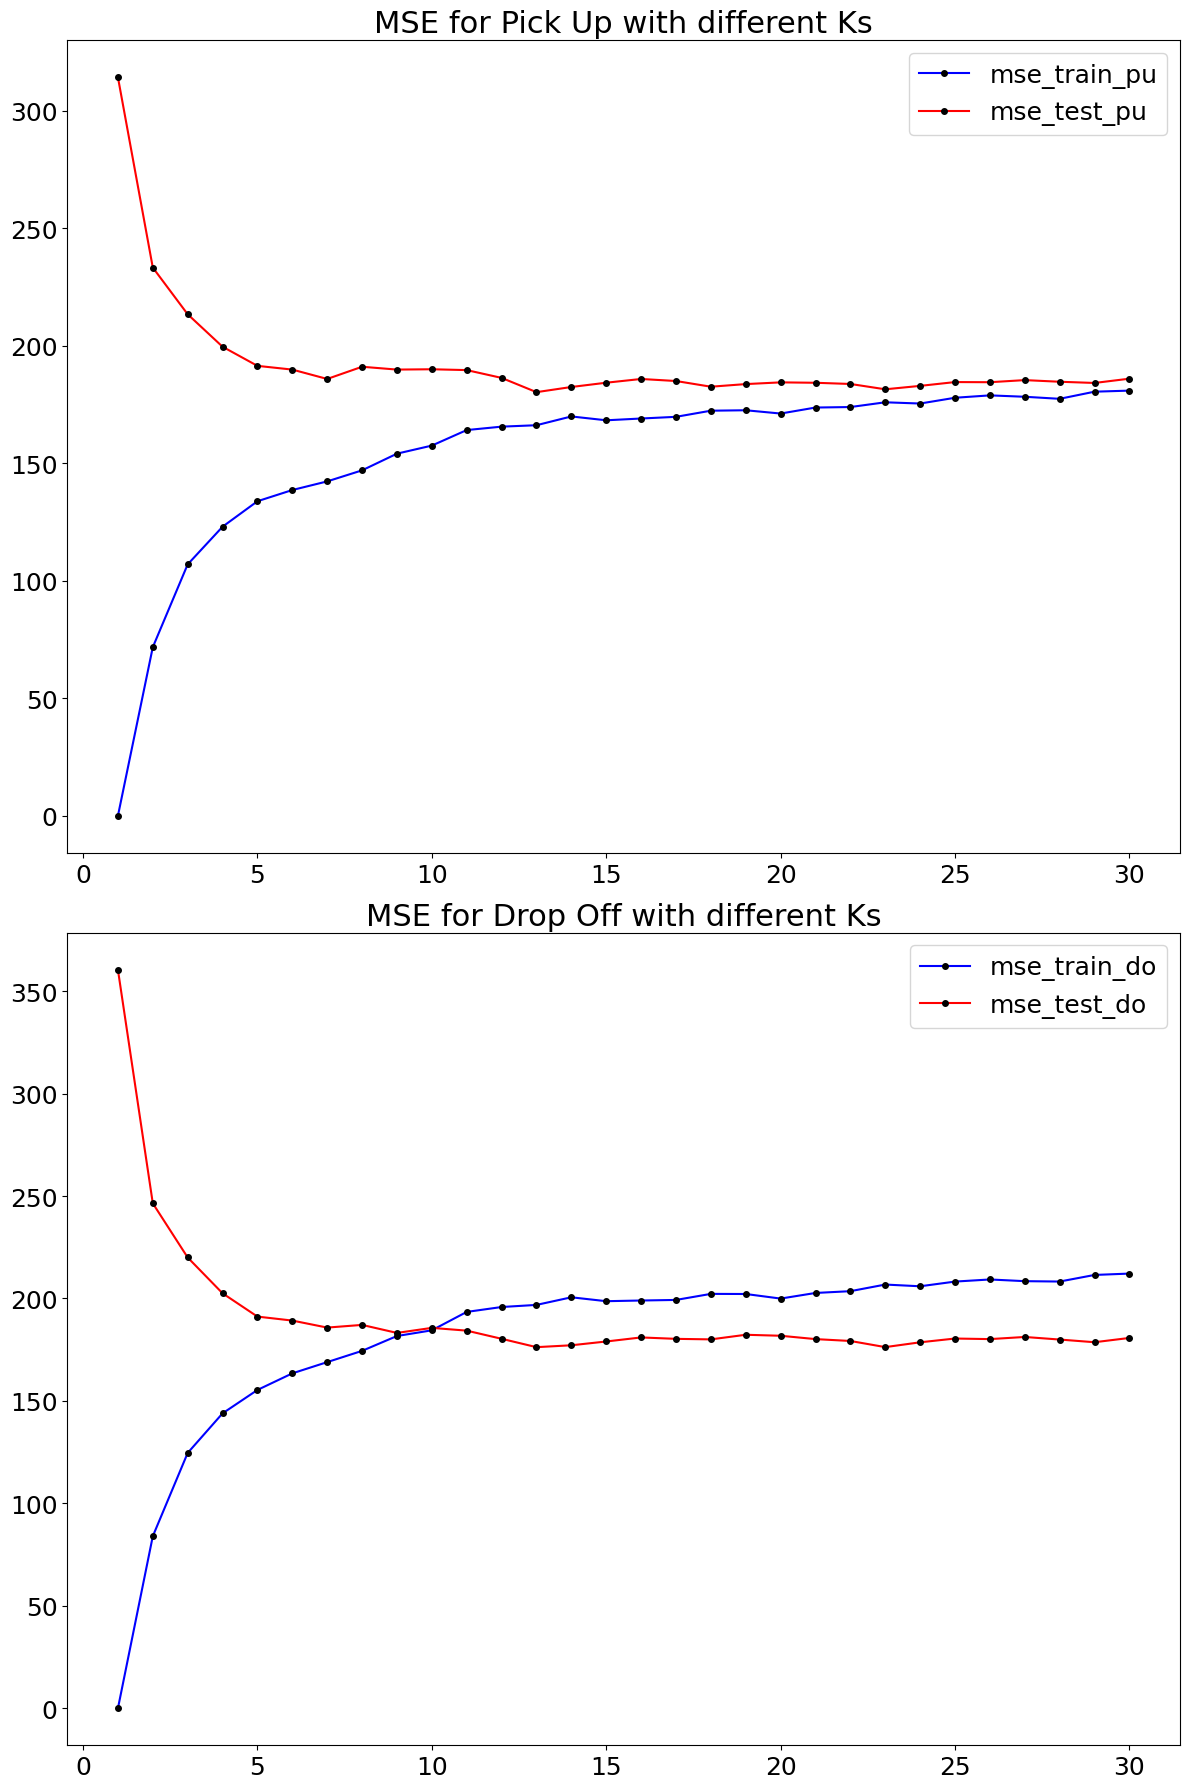

In [728]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 18))

# For 'pick up'
ax1.plot(np.arange(30)+1, mse_train_pu, color='blue', marker='.', markersize=8, markeredgecolor='black', markerfacecolor='black', label='mse_train_pu')
ax1.plot(np.arange(30)+1, mse_test_pu, color='red', marker='.', markersize=8, markeredgecolor='black', markerfacecolor='black', label='mse_test_pu')
ax1.legend(fontsize=18)
ax1.set_title('MSE for Pick Up with different Ks', fontsize=22)
ax1.tick_params(labelsize=18)

# For 'drop off'
ax2.plot(np.arange(30)+1, mse_train_do, color='blue', marker='.', markersize=8, markeredgecolor='black', markerfacecolor='black', label='mse_train_do')
ax2.plot(np.arange(30)+1, mse_test_do, color='red', marker='.', markersize=8, markeredgecolor='black', markerfacecolor='black', label='mse_test_do')
ax2.legend(fontsize=18)
ax2.set_title('MSE for Drop Off with different Ks', fontsize=22)
ax2.tick_params(labelsize=18)

plt.tight_layout()
plt.show()

In [729]:
# Optimal K for 'pick up'
optimal_k_pu = np.argmin(mse_test_pu) + 1
print(f"Optimal K for 'pick up': {optimal_k_pu}")

# Optimal K for 'drop off'
optimal_k_do = np.argmin(mse_test_do) + 1
print(f"Optimal K for 'drop off': {optimal_k_do}")

Optimal K for 'pick up': 13
Optimal K for 'drop off': 13


##### 5.2.2 Hyperparameter Tuning using GridSearchCV

In [730]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the model
model = KNeighborsRegressor()

# Define the parameter grid: n_neighbors from 1 to 20
param_grid = {'n_neighbors': list(range(1, 20))}

# Define the scorer, if you want to use something other than the default for regression (which is R^2)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=5, verbose=1)

# Fit to find the best parameter for 'pu_ct'
grid_search.fit(X_train, y_train['pu_ct'])
best_params_pu = grid_search.best_params_
best_score_pu = grid_search.best_score_

# Output the best parameters and score for 'pu_ct'
print("Best parameters for 'pu_ct':", best_params_pu)
print("Best score for 'pu_ct':", best_score_pu)

# Fit to find the best parameter for 'do_ct'
grid_search.fit(X_train, y_train['do_ct'])
best_params_do = grid_search.best_params_
best_score_do = grid_search.best_score_

# Output the best parameters and score for 'do_ct'
print("Best parameters for 'do_ct':", best_params_do)
print("Best score for 'do_ct':", best_score_do)


Fitting 5 folds for each of 19 candidates, totalling 95 fits
Best parameters for 'pu_ct': {'n_neighbors': 18}
Best score for 'pu_ct': -197.13205374154987
Fitting 5 folds for each of 19 candidates, totalling 95 fits
Best parameters for 'do_ct': {'n_neighbors': 18}
Best score for 'do_ct': -228.94919903166027


#### 5.3 Re-Train The model based on the Cross-validation (K-fold validation,Hyperparameter)

In [731]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# For 'pu_ct'
knn_pu = KNeighborsRegressor(n_neighbors=18)
knn_pu.fit(X_train, y_train['pu_ct'])
y_pred_pu = knn_pu.predict(X_test)
mse_train_pu = mean_squared_error(y_train['pu_ct'], knn_pu.predict(X_train))
mse_test_pu = mean_squared_error(y_test['pu_ct'], y_pred_pu)

print(f"KNN prediction for 'pick up' for the first day: {y_pred_pu[0]}")
print(f"Actual value for 'pick up' for the first day: {y_test['pu_ct'].values[0]}")
print(f"MSE for 'pick up' on training data: {mse_train_pu}")
print(f"MSE for 'pick up' on testing data: {mse_test_pu}")

# For 'do_ct'
knn_do = KNeighborsRegressor(n_neighbors=18)
knn_do.fit(X_train, y_train['do_ct'])
y_pred_do = knn_do.predict(X_test)
mse_train_do = mean_squared_error(y_train['do_ct'], knn_do.predict(X_train))
mse_test_do = mean_squared_error(y_test['do_ct'], y_pred_do)

print(f"\nKNN prediction for 'drop off' for the first day: {y_pred_do[0]}")
print(f"Actual value for 'drop off' for the first day: {y_test['do_ct'].values[0]}")
print(f"MSE for 'drop off' on training data: {mse_train_do}")
print(f"MSE for 'drop off' on testing data: {mse_test_do}")

KNN prediction for 'pick up' for the first day: 29.666666666666668
Actual value for 'pick up' for the first day: 25
MSE for 'pick up' on training data: 172.36524043068945
MSE for 'pick up' on testing data: 182.56933874513783

KNN prediction for 'drop off' for the first day: 29.11111111111111
Actual value for 'drop off' for the first day: 26
MSE for 'drop off' on training data: 202.2481396922036
MSE for 'drop off' on testing data: 180.04318873668188


In [732]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# For 'pu_ct'
knn_pu = KNeighborsRegressor(n_neighbors=13)
knn_pu.fit(X_train, y_train['pu_ct'])
y_pred_pu = knn_pu.predict(X_test)
mse_train_pu = mean_squared_error(y_train['pu_ct'], knn_pu.predict(X_train))
mse_test_pu = mean_squared_error(y_test['pu_ct'], y_pred_pu)

print(f"KNN prediction for 'pick up' for the first day: {y_pred_pu[0]}")
print(f"Actual value for 'pick up' for the first day: {y_test['pu_ct'].values[0]}")
print(f"MSE for 'pick up' on training data: {mse_train_pu}")
print(f"MSE for 'pick up' on testing data: {mse_test_pu}")

# For 'do_ct'
knn_do = KNeighborsRegressor(n_neighbors=13)
knn_do.fit(X_train, y_train['do_ct'])
y_pred_do = knn_do.predict(X_test)
mse_train_do = mean_squared_error(y_train['do_ct'], knn_do.predict(X_train))
mse_test_do = mean_squared_error(y_test['do_ct'], y_pred_do)

print(f"\nKNN prediction for 'drop off' for the first day: {y_pred_do[0]}")
print(f"Actual value for 'drop off' for the first day: {y_test['do_ct'].values[0]}")
print(f"MSE for 'drop off' on training data: {mse_train_do}")
print(f"MSE for 'drop off' on testing data: {mse_test_do}")

KNN prediction for 'pick up' for the first day: 25.53846153846154
Actual value for 'pick up' for the first day: 25
MSE for 'pick up' on training data: 166.18443165545378
MSE for 'pick up' on testing data: 180.25301937261895

KNN prediction for 'drop off' for the first day: 24.46153846153846
Actual value for 'drop off' for the first day: 26
MSE for 'drop off' on training data: 196.86366215449462
MSE for 'drop off' on testing data: 176.24856123855068


Given the slightly better MSE performance with K=13 and considering the trade-off between model complexity and performance, the K-fold validation result seems preferable in this scenario.

##### In-sample Business metric

In [733]:
# For 'pu_ct'
knn_pu = KNeighborsRegressor(n_neighbors=13)
knn_pu.fit(X_train, y_train['pu_ct'])

# In-sample predictions for 'pu_ct'
y_train_pred_pu = knn_pu.predict(X_train)

print(f"In-sample prediction for 'pick up' for the first day: {round(y_train_pred_pu[0])}")
print(f"Actual value for 'pick up' for the first day: {y_train['pu_ct'].values[0]}")

# For 'do_ct'
knn_do = KNeighborsRegressor(n_neighbors=13)
knn_do.fit(X_train, y_train['do_ct'])

# In-sample predictions for 'do_ct'
y_train_pred_do = knn_do.predict(X_train)

print(f"\nIn-sample prediction for 'drop off' for the first day: {round(y_train_pred_do[0])}")
print(f"Actual value for 'drop off' for the first day: {y_train['do_ct'].values[0]}")

In-sample prediction for 'pick up' for the first day: 30
Actual value for 'pick up' for the first day: 39

In-sample prediction for 'drop off' for the first day: 33
Actual value for 'drop off' for the first day: 42


##### Out-sample Business metric

In [734]:
# For 'pu_ct'
knn_pu = KNeighborsRegressor(n_neighbors=13)
knn_pu.fit(X_train, y_train['pu_ct'])

# Out-of-sample predictions for 'pu_ct'
y_test_pred_pu = knn_pu.predict(X_test)

print(f"Out-of-sample prediction for 'pick up' for the first day: {round(y_test_pred_pu[0])}")
print(f"Actual value for 'pick up' for the first day: {y_test['pu_ct'].values[0]}")

# For 'do_ct'
knn_do = KNeighborsRegressor(n_neighbors=13)
knn_do.fit(X_train, y_train['do_ct'])

# Out-of-sample predictions for 'do_ct'
y_test_pred_do = knn_do.predict(X_test)

print(f"\nOut-of-sample prediction for 'drop off' for the first day: {round(y_test_pred_do[0])}")
print(f"Actual value for 'drop off' for the first day: {y_test['do_ct'].values[0]}")

Out-of-sample prediction for 'pick up' for the first day: 26
Actual value for 'pick up' for the first day: 25

Out-of-sample prediction for 'drop off' for the first day: 24
Actual value for 'drop off' for the first day: 26


#####

#### 5.4 Decision Performance Evaluation

##### 5.4.1 (prediction + min-cost strategy)

In [735]:
# Predict 'pu_ct' and 'do_ct' for the test set using the KNeighborsRegressor models

y_test_pred_pu = knn_pu.predict(X_test)
y_test_pred_do = knn_do.predict(X_test)



# Calculate the total costs using predictions and actual values
costs_pred = []
costs_actual = []

# Define the penalty values
alpha = 2  # Penalty for each unsuccessful pickup
beta = 3   # Penalty for each unsuccessful drop-off

for i in range(len(y_test)):
    # Predicted costs
    pu_pred, do_pred = y_test_pred_pu[i], y_test_pred_do[i]
    x_pred = min(pu_pred, 17 - do_pred)  # Allocate bikes to meet predicted pickup if possible
    y_pred = 17 - x_pred  # Remaining to open docks
    costs_pred.append(calculate_total_cost(y_test.iloc[i], [pu_pred, do_pred], x_pred, y_pred, alpha, beta))
    
    # Actual costs
    pu_act, do_act = y_test.iloc[i]
    x_act = min(pu_act, 17 - do_act)  # Allocate bikes to meet actual pickup if possible
    y_act = 17 - x_act  # Remaining to open docks
    costs_actual.append(calculate_total_cost(y_test.iloc[i], [pu_act, do_act], x_act, y_act, alpha, beta))

# Calculate average costs
average_cost_pred = sum(costs_pred) / len(costs_pred)
average_cost_actual = sum(costs_actual) / len(costs_actual)

# Print the average costs
print(f'Average predicted total cost: {average_cost_pred}')
print(f'Average actual total cost: {average_cost_actual}')

# Suggest which model to use based on the lower average cost
if average_cost_pred < average_cost_actual:
    print("The KNeighborsRegressor model's prediction strategy is cost-effective.")
else:
    print("The actual strategy is more cost-effective.")

Average predicted total cost: 96.12434141201267
Average actual total cost: 80.89041095890411
The actual strategy is more cost-effective.


##### 5.4.2 prediction + max-QoS (quality of service) strategy

## Conclusion

In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def compare_models(X_train, y_train_pu, y_train_do, X_test, y_test_pu, y_test_do):
    models = [
        ('ElasticNet PU', ElasticNet(alpha=0.23253197138037357)),
        ('ElasticNet DO', ElasticNet(alpha=0.46500367310245894)),
        ('KNeighborsRegressor', KNeighborsRegressor(n_neighbors=13)),  # Use optimal K value
        ('Lasso PU', Lasso(alpha=0.4229242874389499)),
        ('Lasso DO', Lasso(alpha=0.8111308307896868)),
        ('Ridge PU', Ridge(alpha=284.8035868435799)),
        ('Ridge DO', Ridge(alpha=3274.549162877725))
    ]

    for target, y_train, y_test in [('pick up', y_train_pu, y_test_pu), ('drop off', y_train_do, y_test_do)]:
        print(f"\nResults for {target}:")
        for name, model in models:
            if 'PU' in name and target == 'drop off':
                continue
            if 'DO' in name and target == 'pick up':
                continue
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = model.score(X_test, y_test)
            print(f'{name} MSE: {mse}, R^2: {r2}')

compare_models(X_train, y_train['pu_ct'], y_train['do_ct'], X_test, y_test['pu_ct'], 

Results for pick up:
ElasticNet PU MSE: 151.95559987463164, R^2: 0.18356177785561245
KNeighborsRegressor MSE: 180.25301937261895, R^2: 0.031523321324418485
Lasso PU MSE: 152.8856443542155, R^2: 0.17856476647825548
Ridge PU MSE: 151.40943951712217, R^2: 0.1864962283902335

Results for drop off:
ElasticNet DO MSE: 149.741964317165, R^2: 0.19564188726065634
KNeighborsRegressor MSE: 176.24856123855068, R^2: 0.05325831180769125
Lasso DO MSE: 149.44341394242733, R^2: 0.19724558878198128
Ridge DO MSE: 151.29130407497962, R^2: 0.18731941059707935